In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [4]:
def col_to_cat(training_data):
    training_data_copy = training_data.copy()
    for column in training_data_copy:
        if training_data_copy[column].dtype == object:
            integer = 0
            for unique_col in training_data_copy[column].unique():
                integer += 1
                training_data_copy.loc[training_data_copy[column] == unique_col , column] = float(integer)
        else:
            pass
    return training_data_copy

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
total_dataset = pd.merge(train, test, how = 'outer')

In [7]:
total_dataset_nnull = total_dataset[total_dataset['SalePrice'].notnull()]

In [8]:
Y_values = total_dataset_nnull['SalePrice']

In [9]:
X_values = total_dataset_nnull.drop('SalePrice', axis = 1)

In [10]:
X_values_new = col_to_cat(X_values)

C:\Users\sboyukliyski\AppData\Local\Temp\ipykernel_4164\991159805.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15, 5))


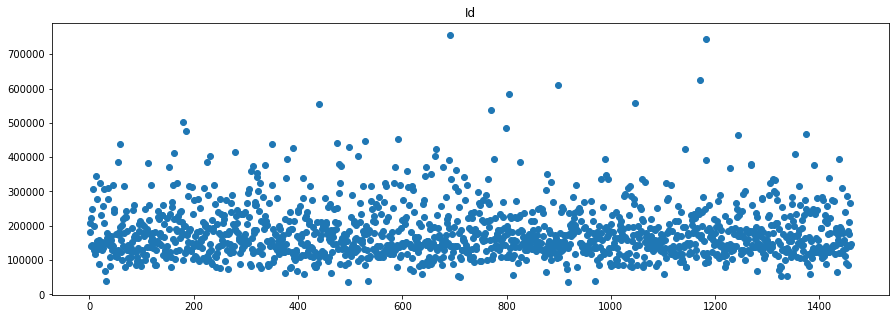

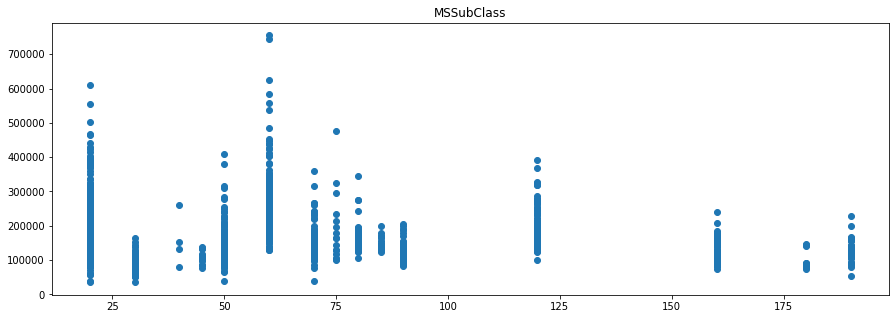

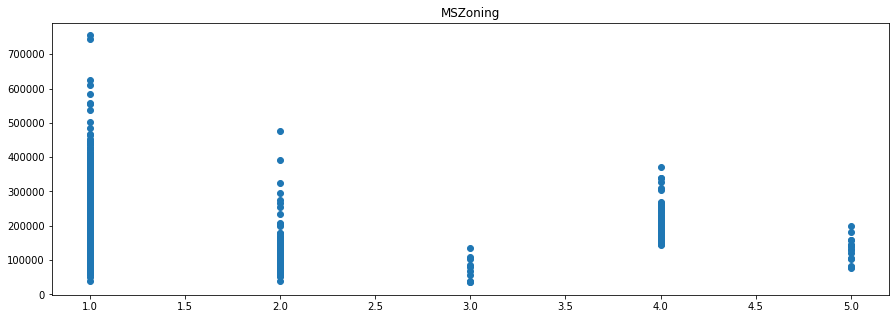

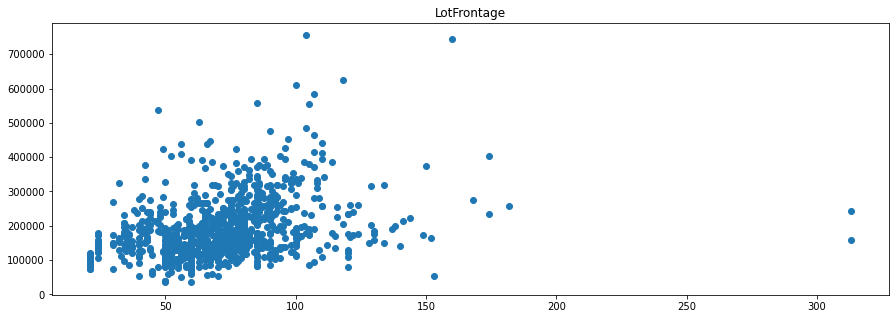

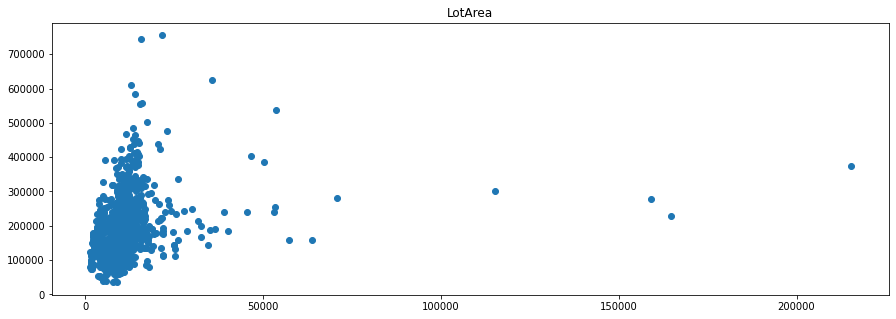

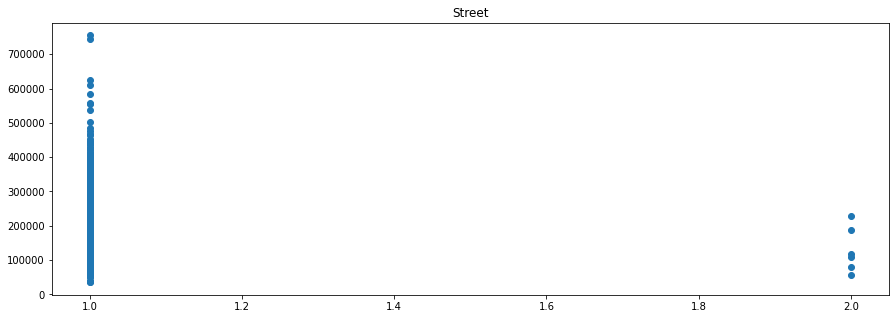

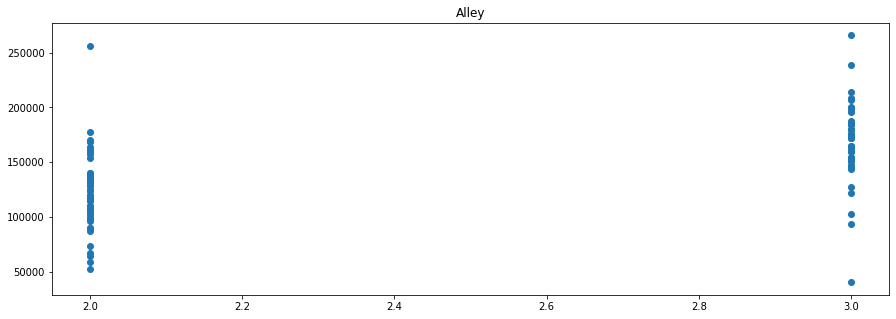

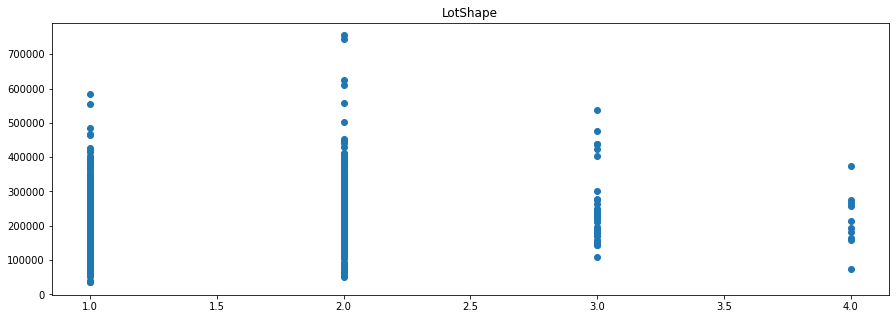

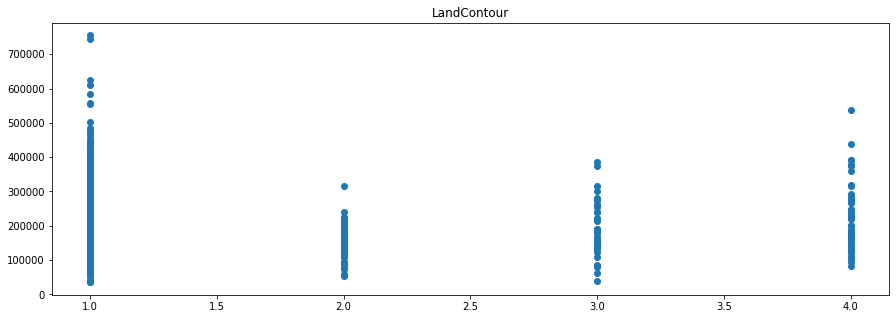

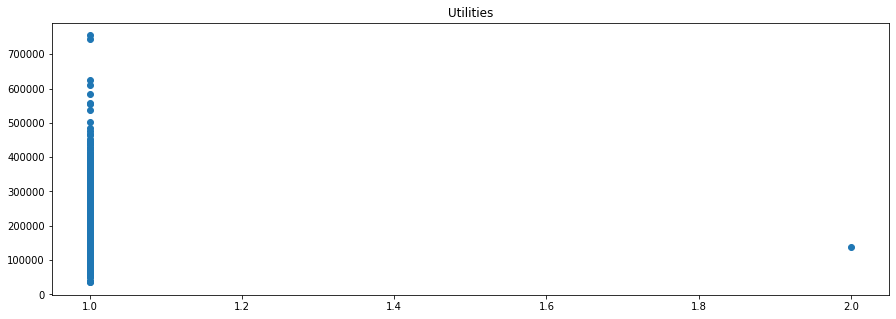

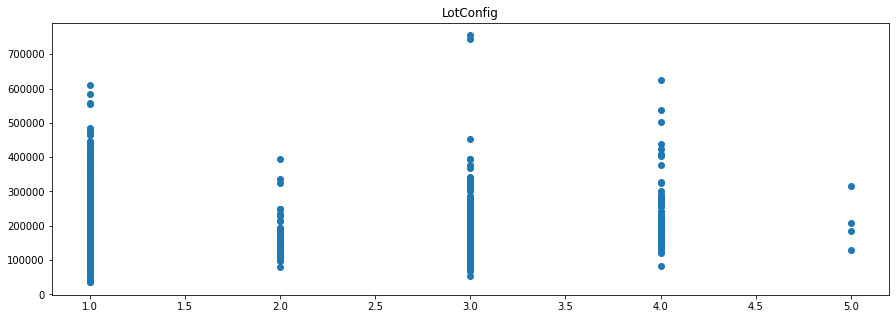

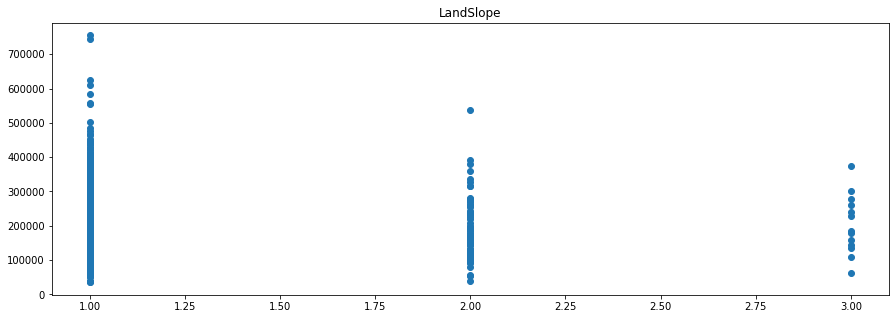

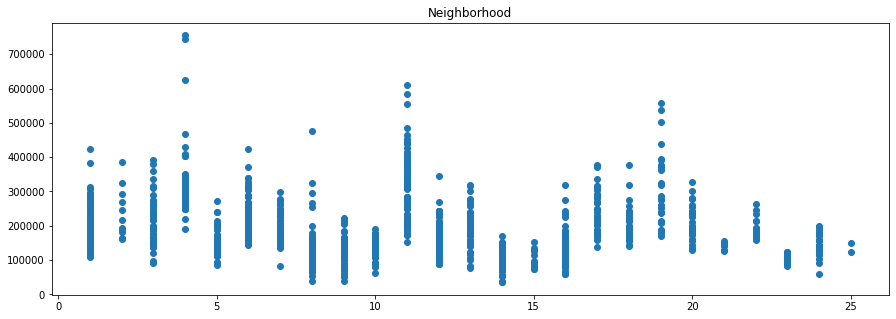

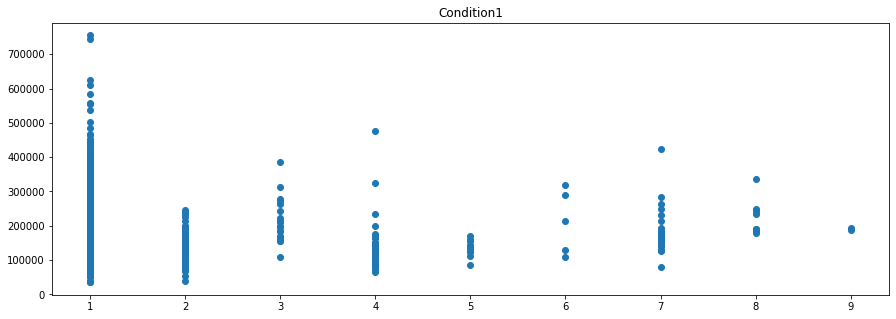

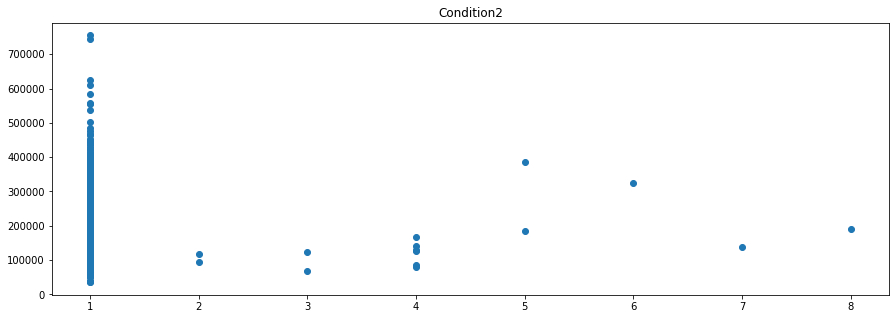

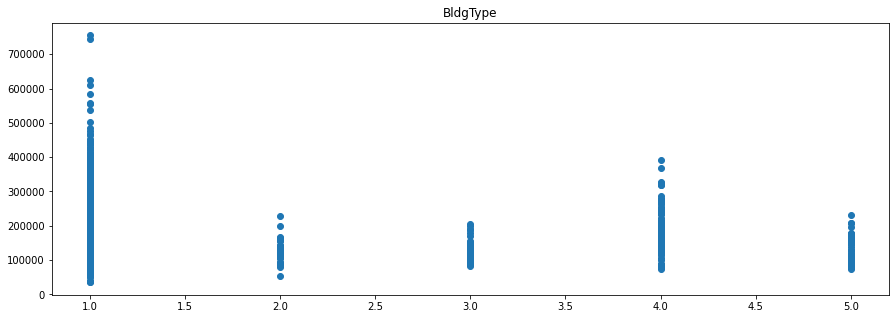

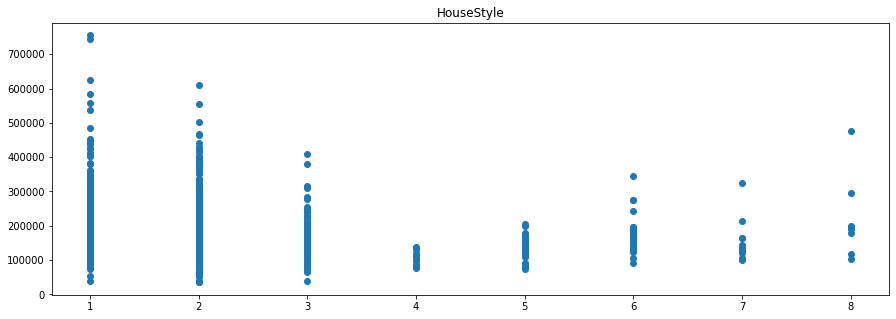

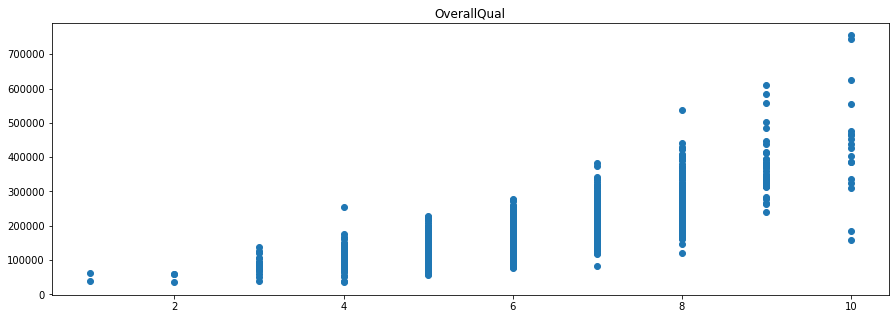

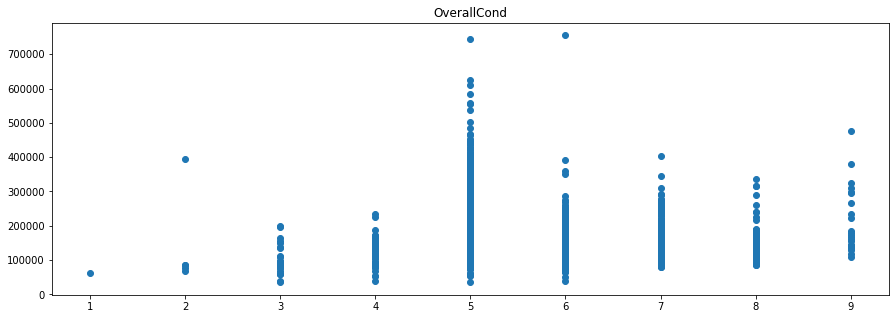

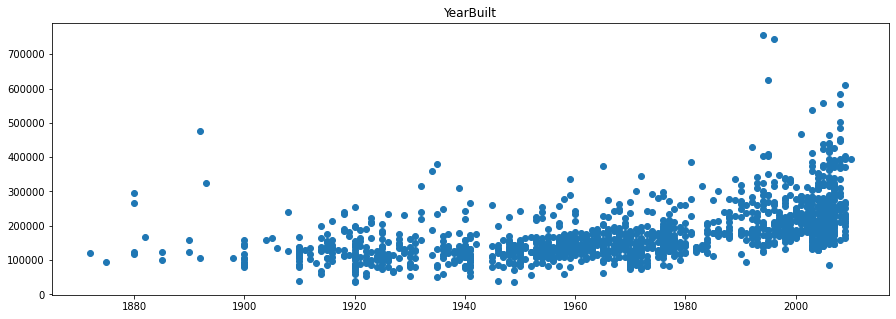

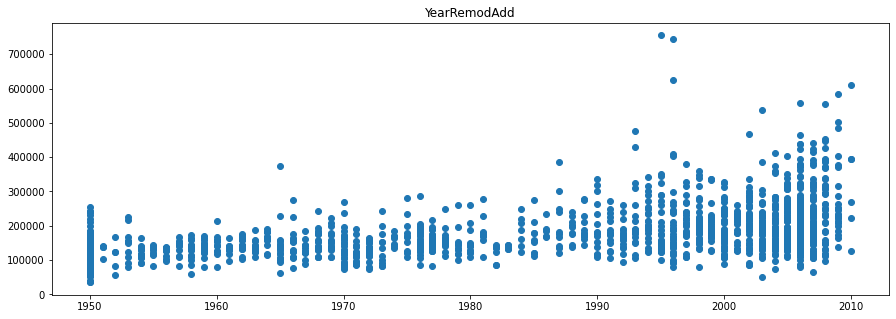

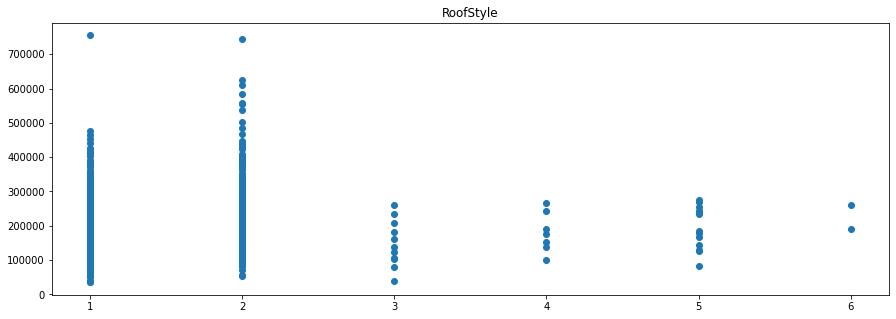

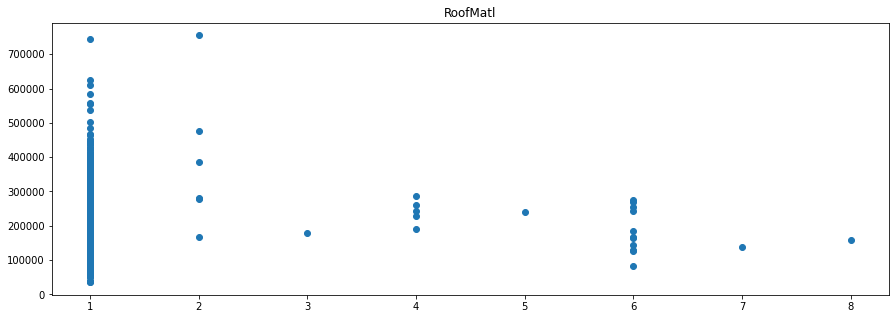

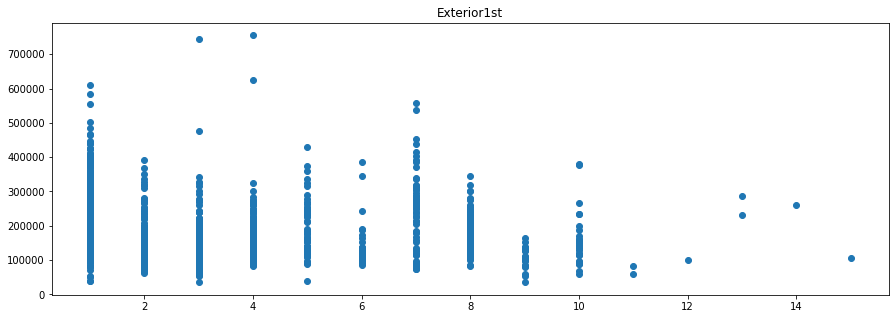

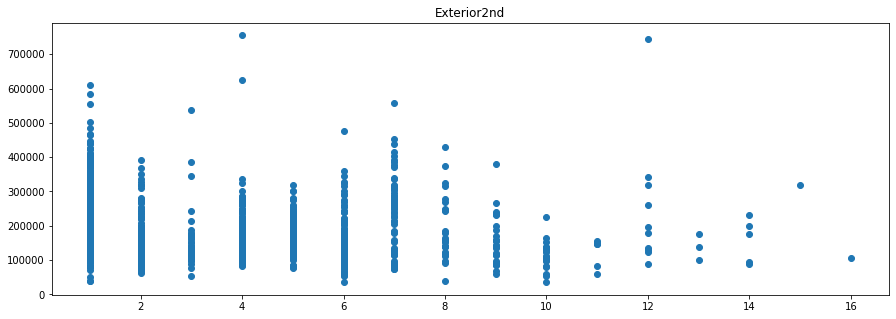

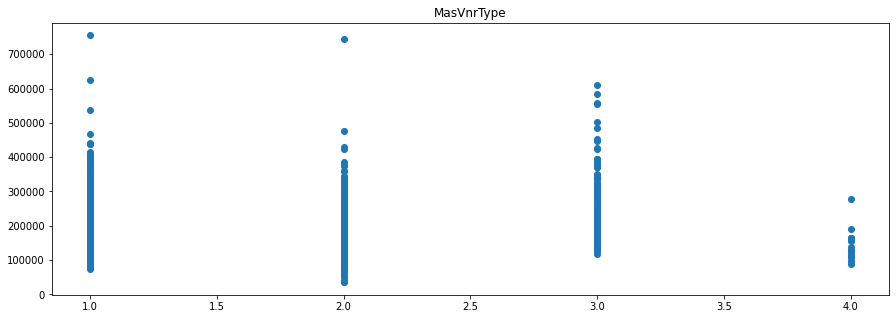

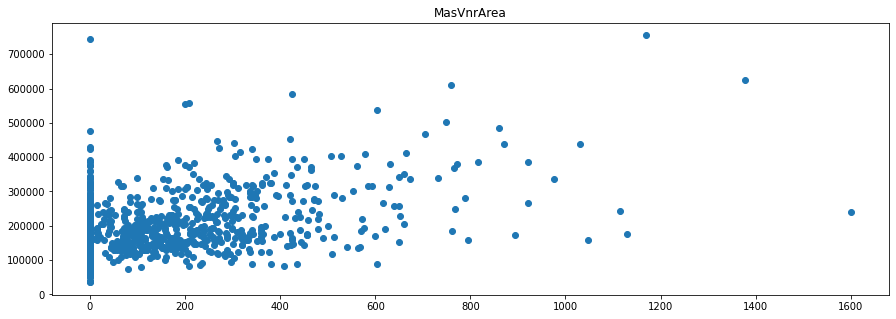

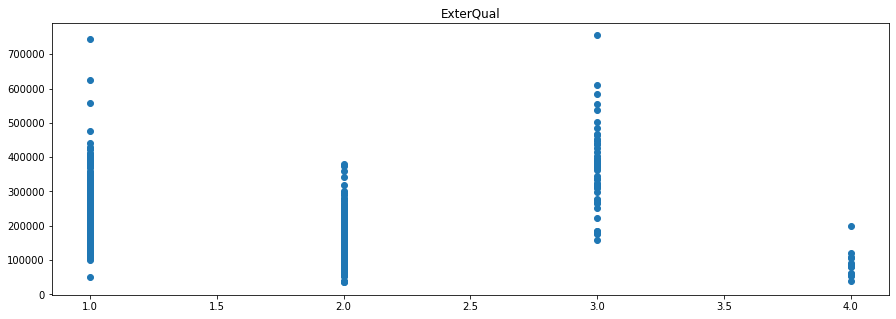

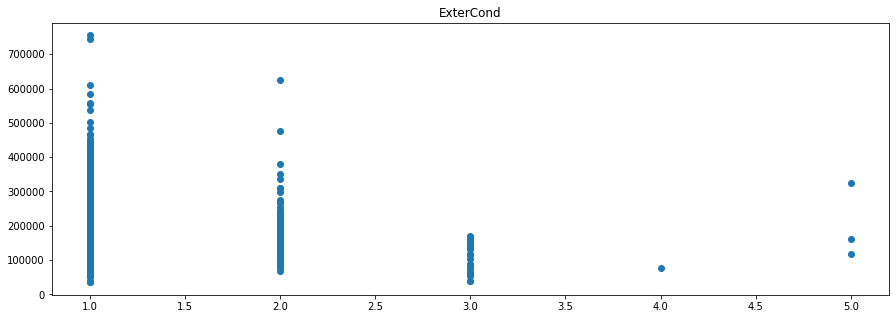

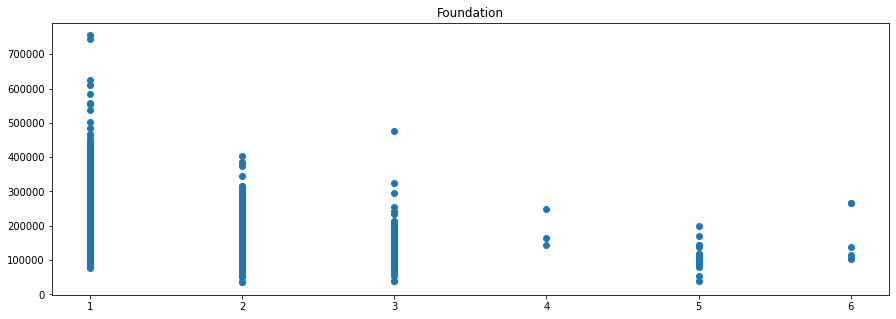

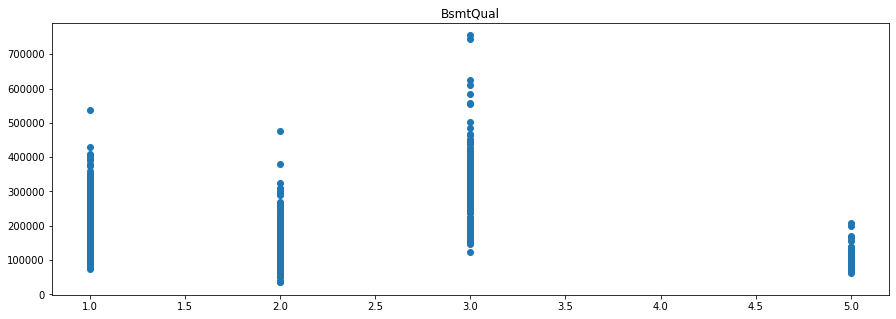

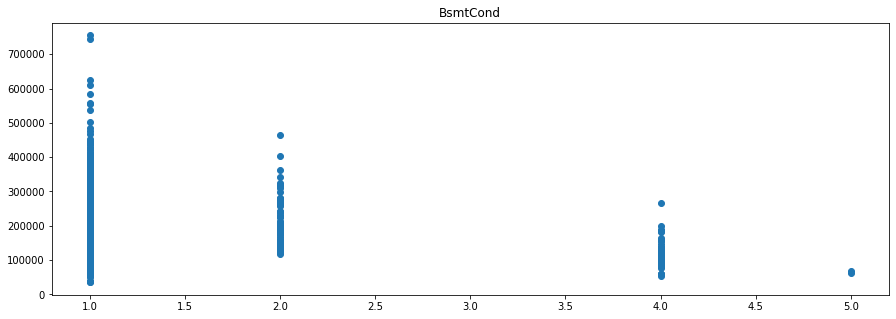

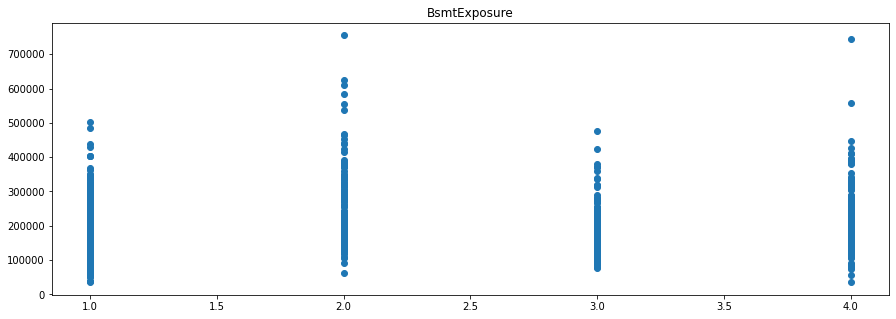

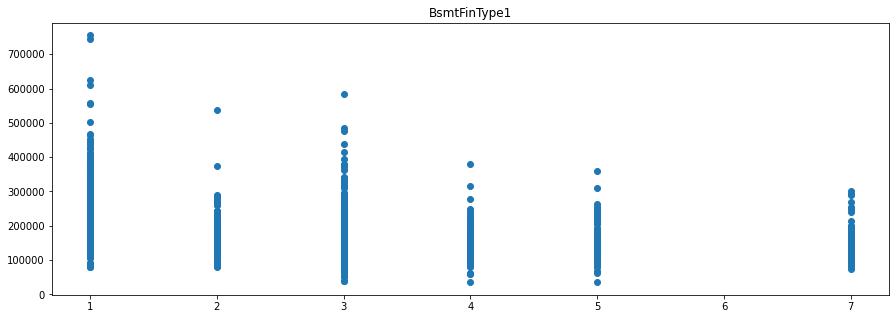

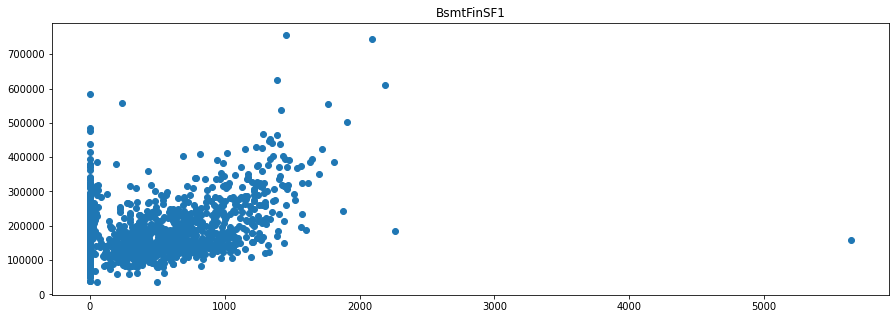

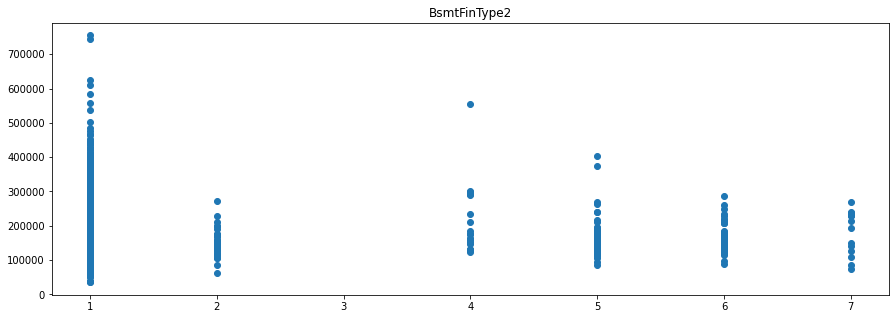

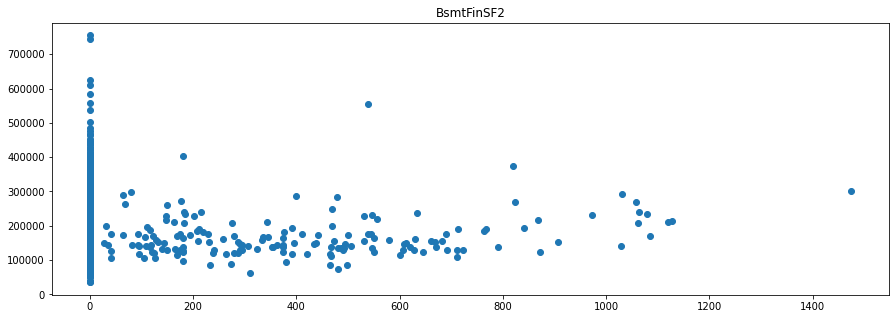

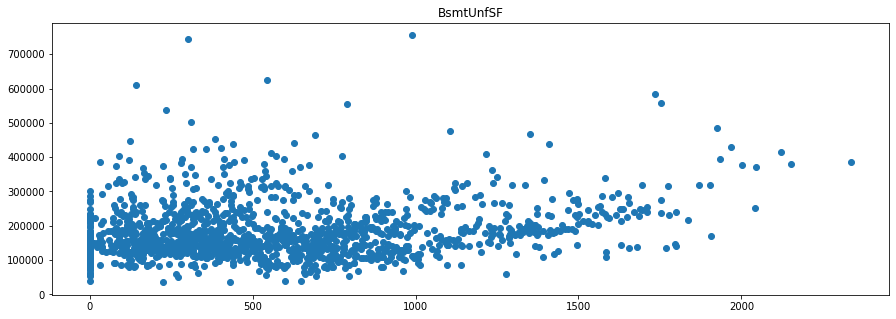

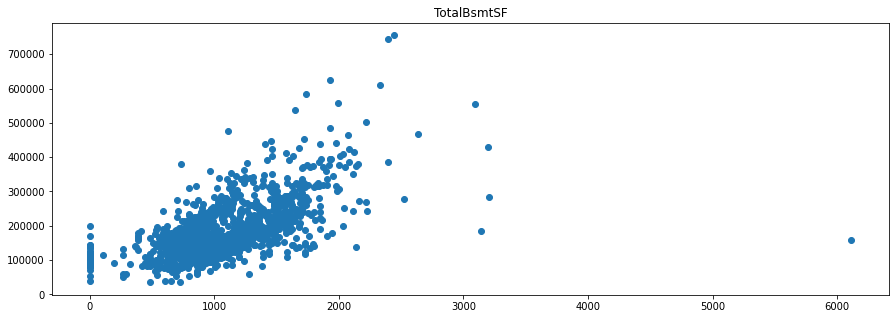

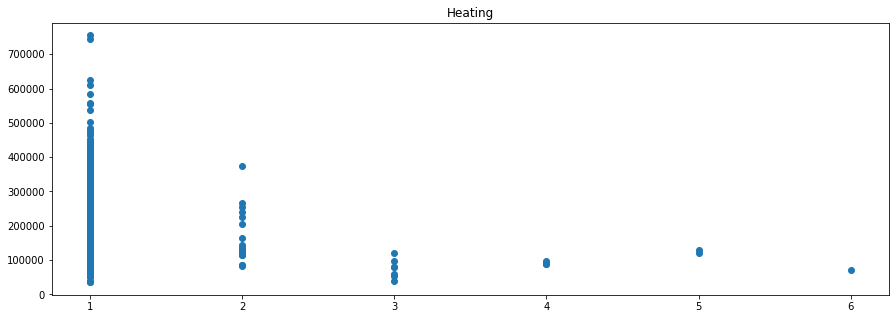

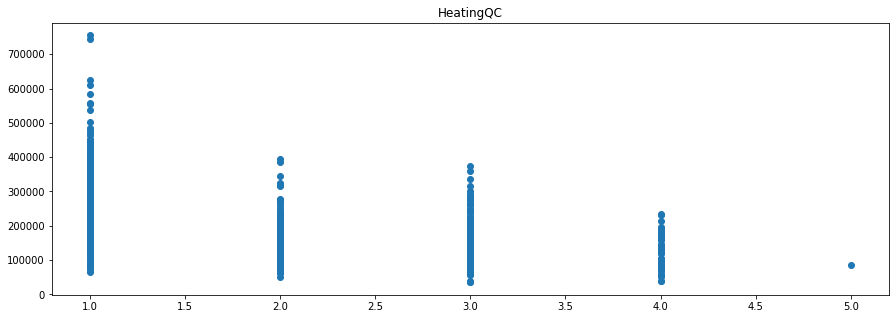

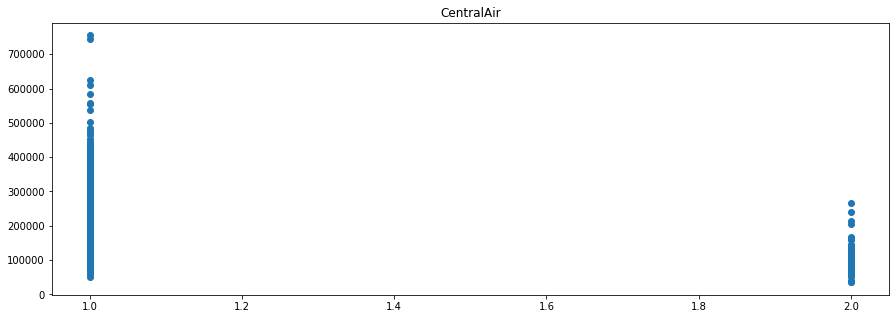

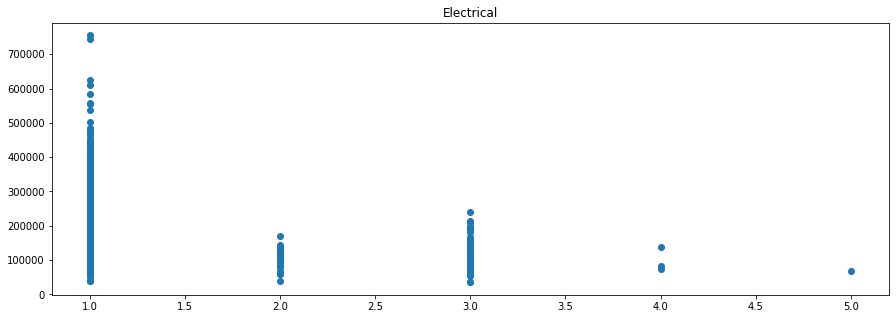

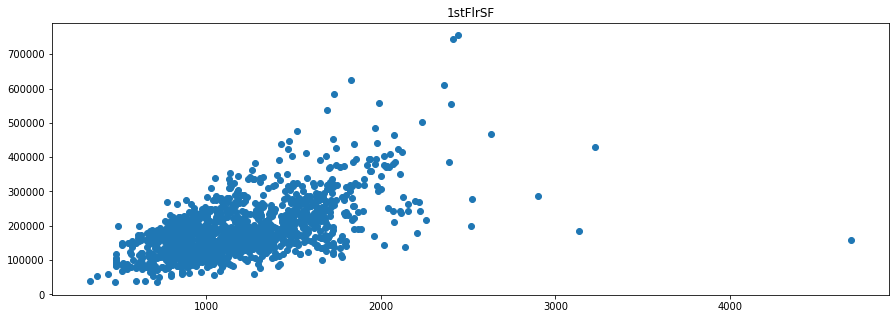

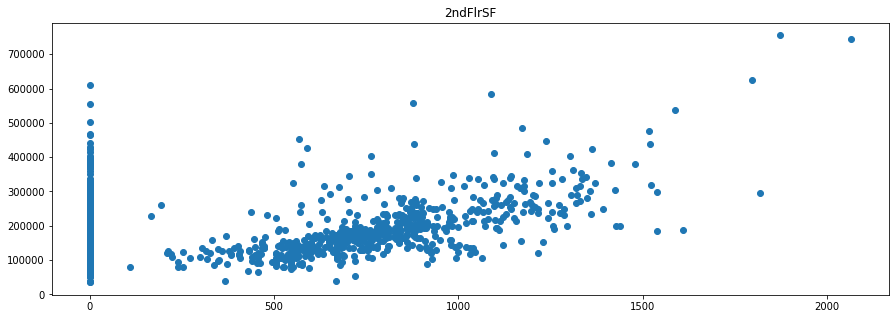

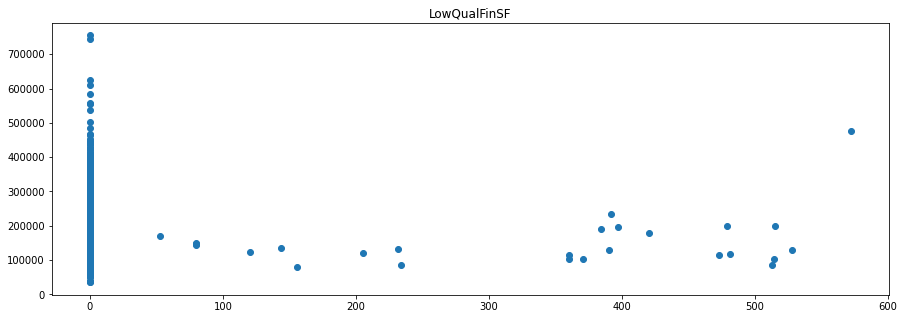

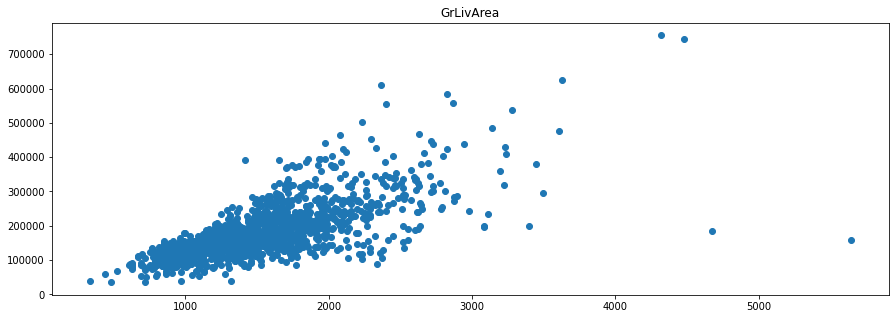

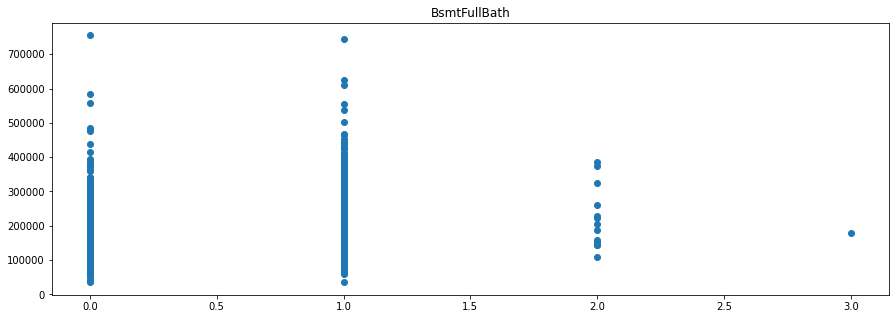

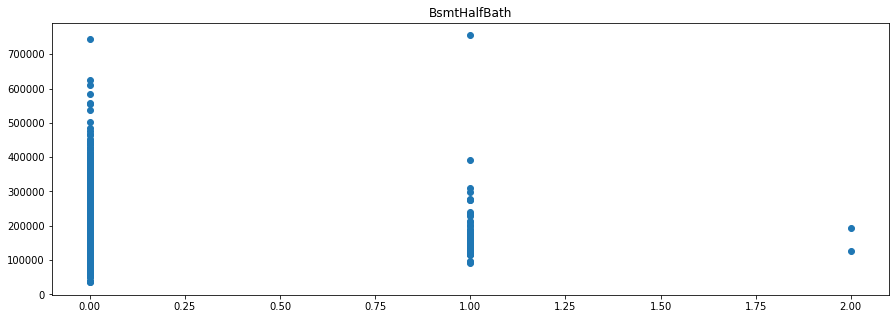

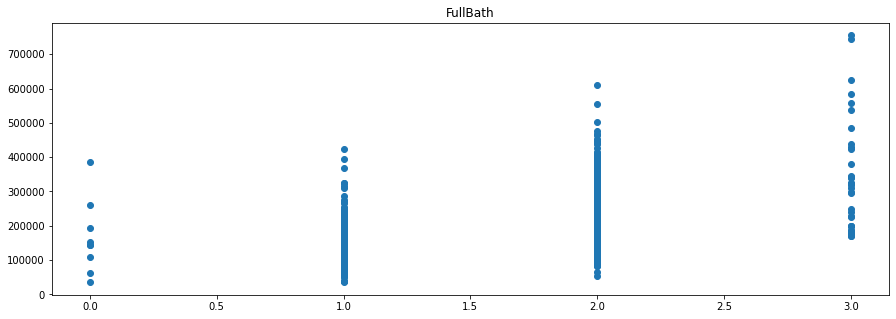

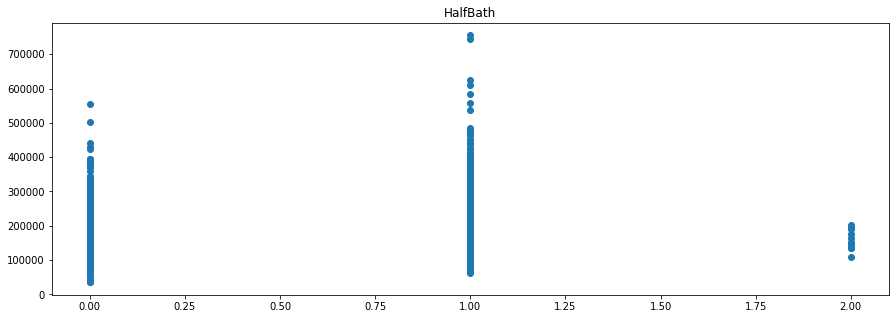

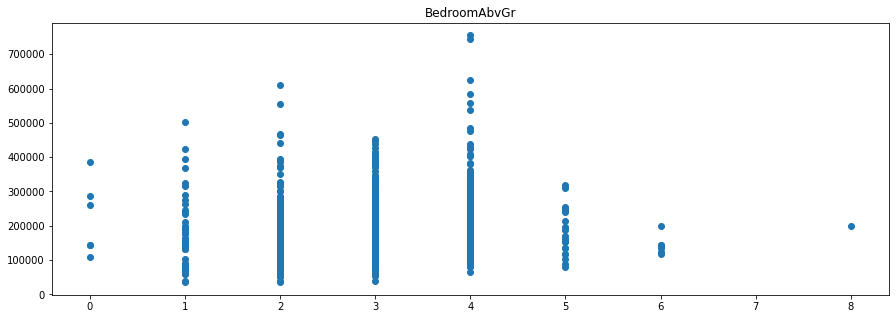

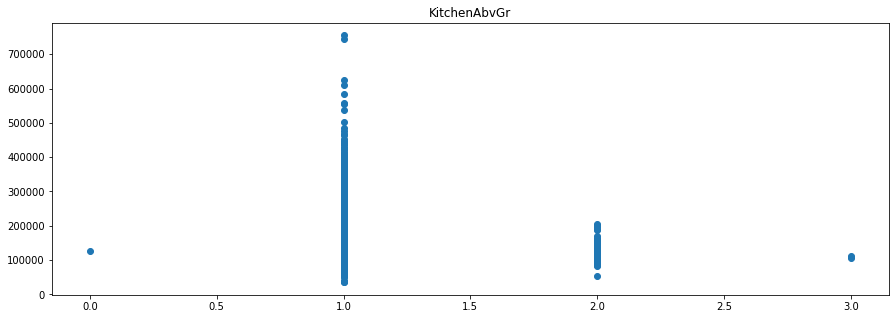

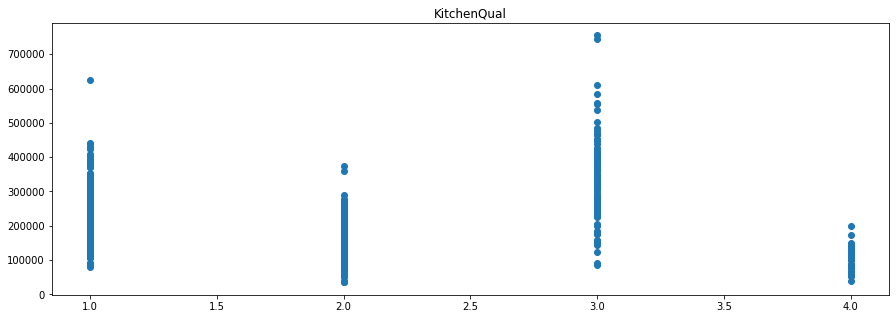

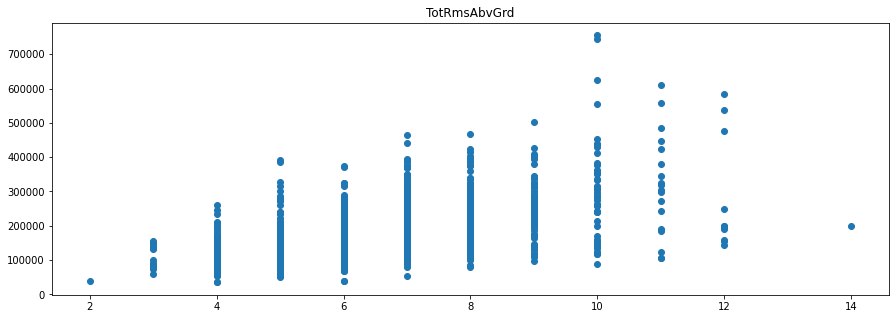

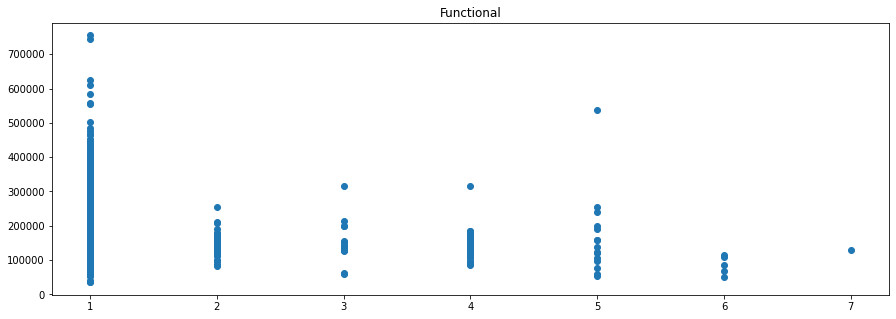

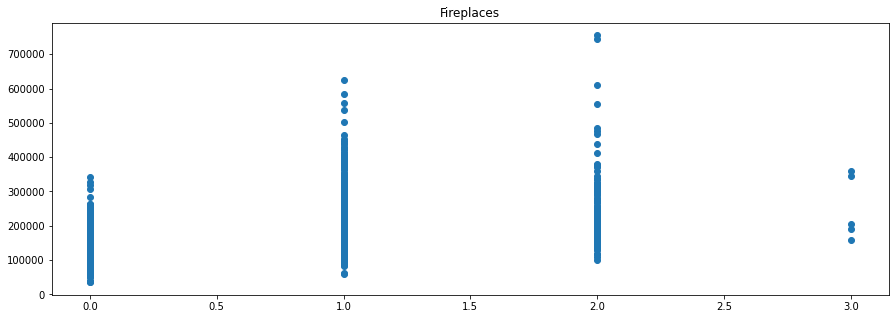

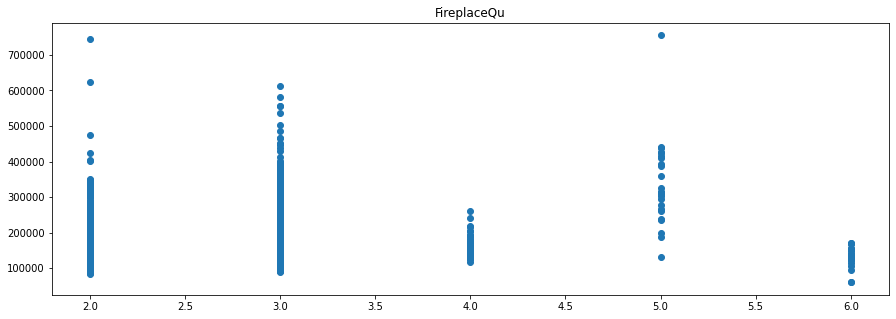

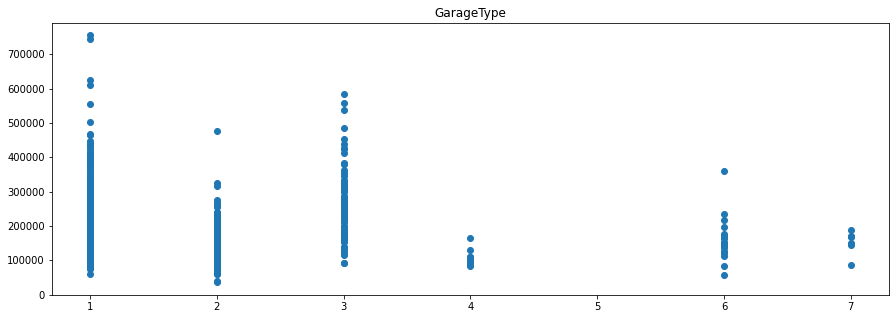

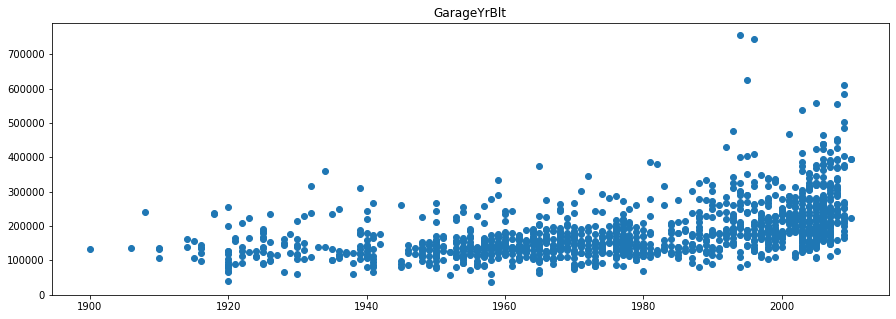

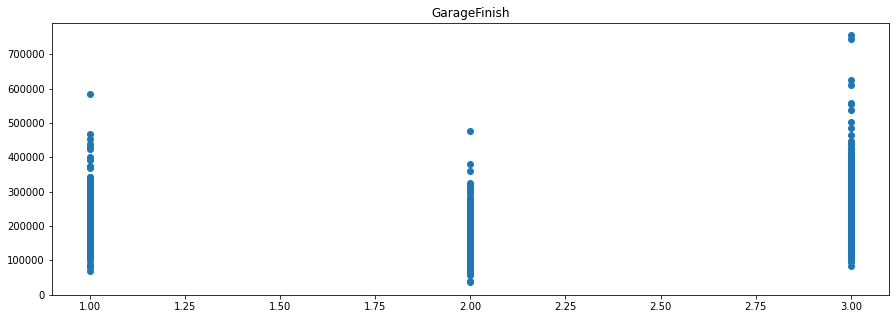

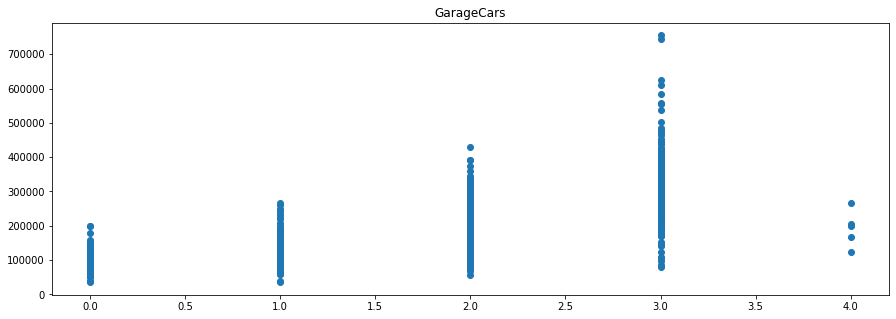

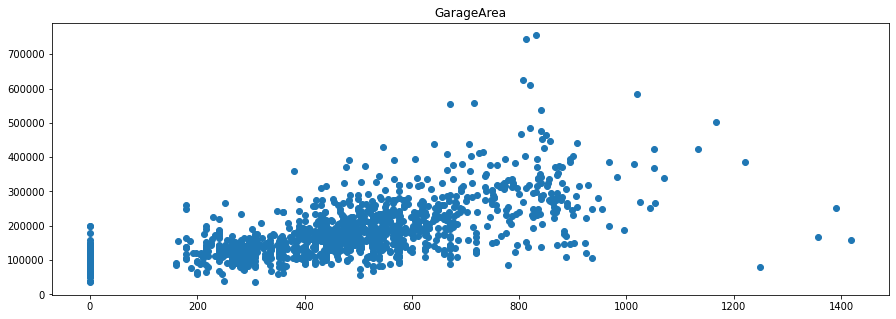

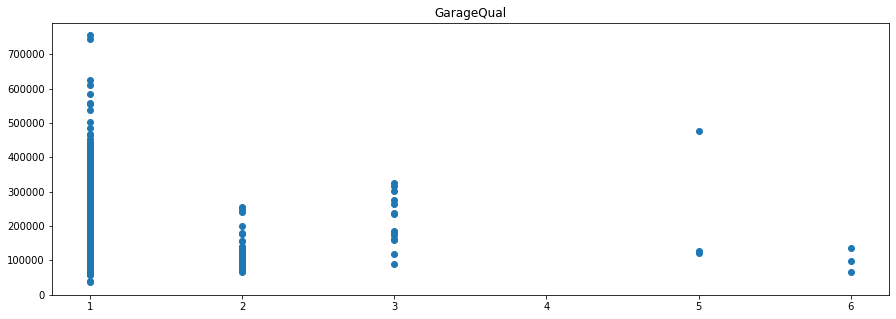

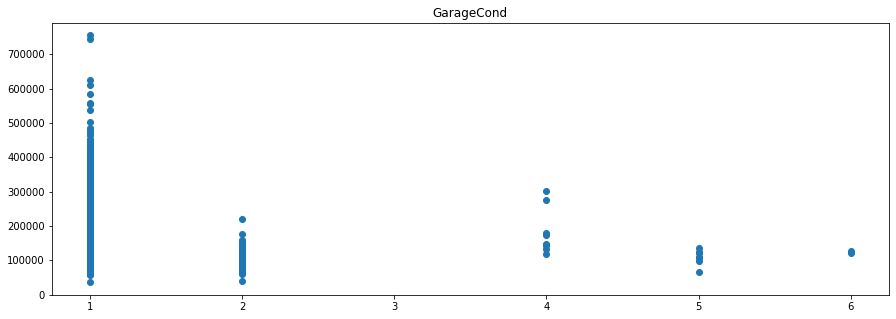

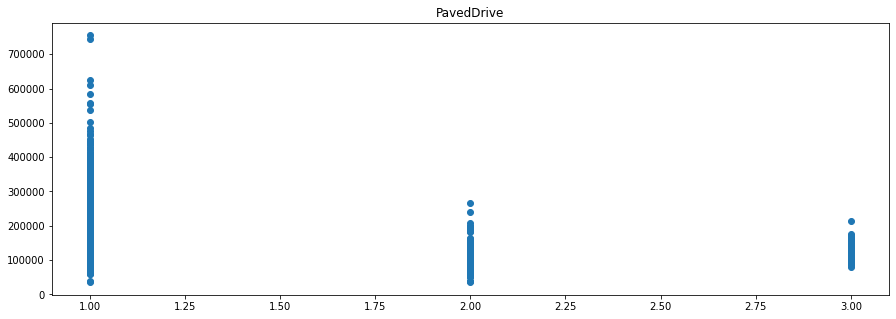

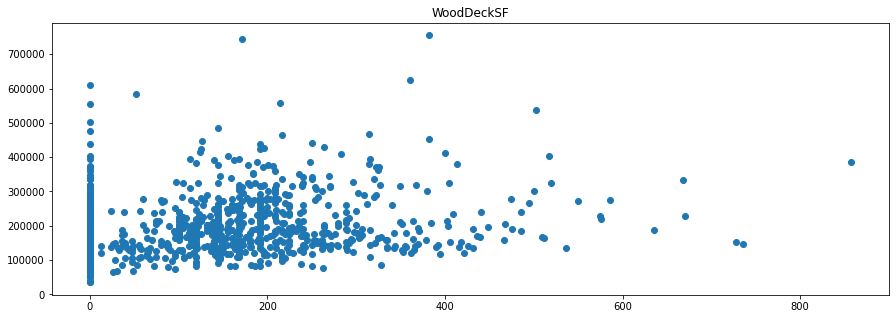

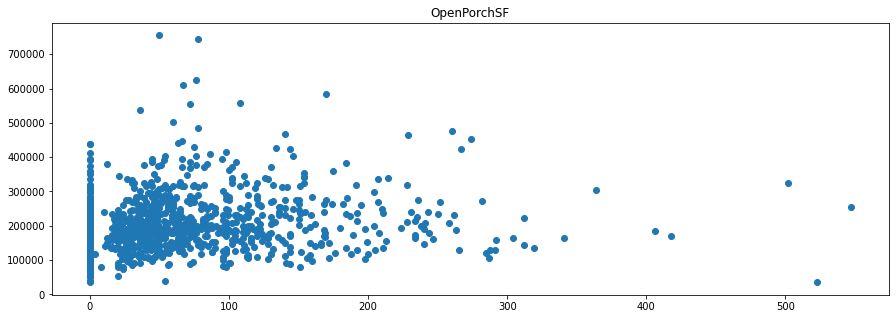

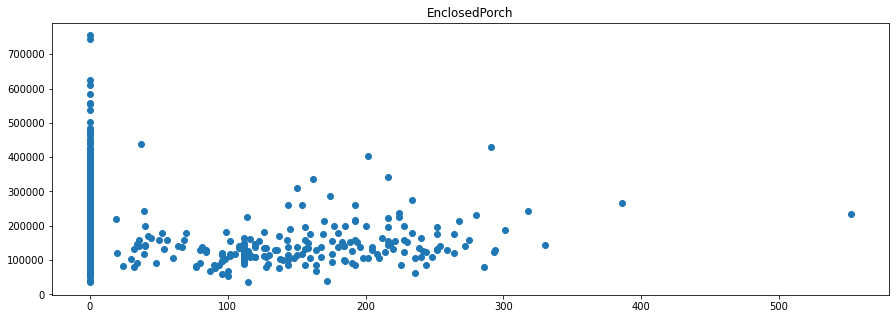

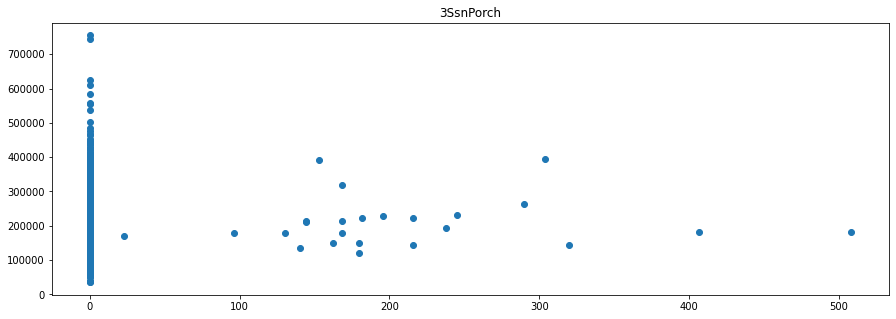

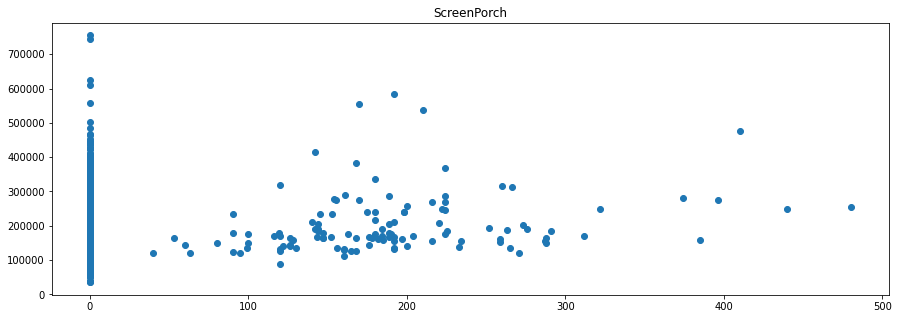

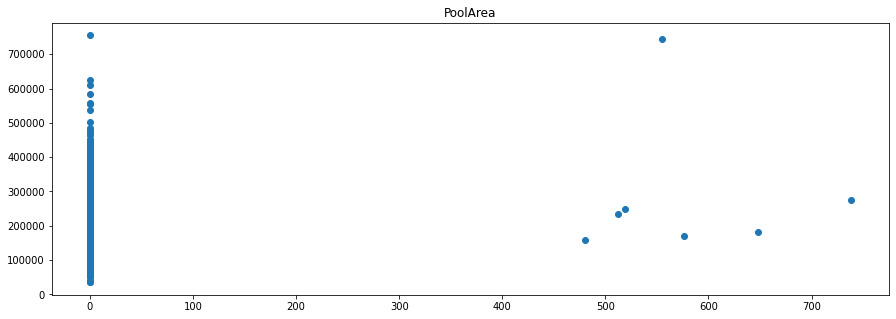

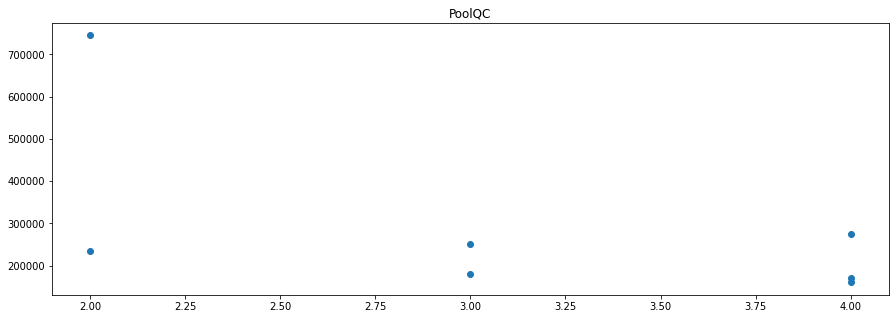

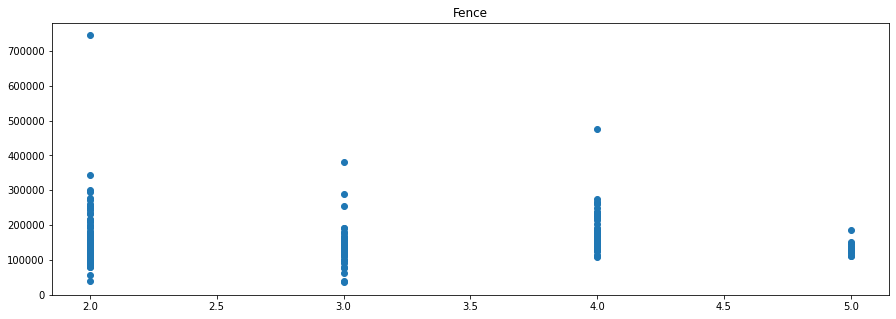

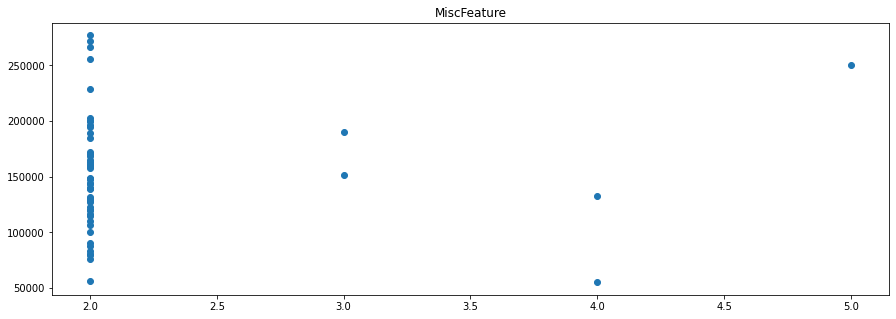

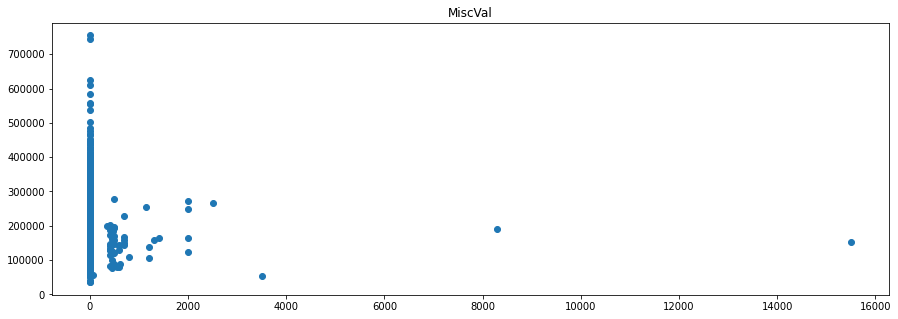

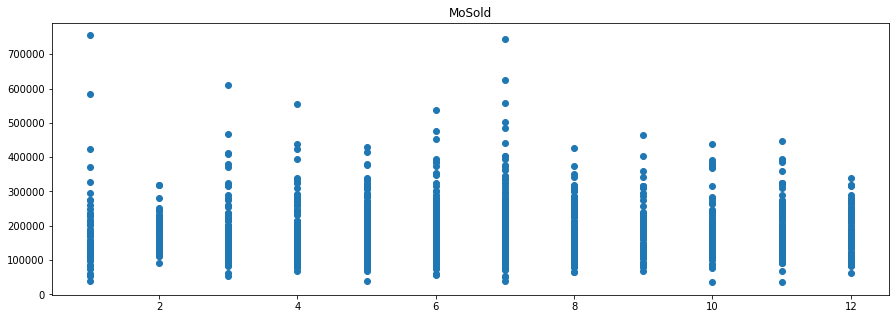

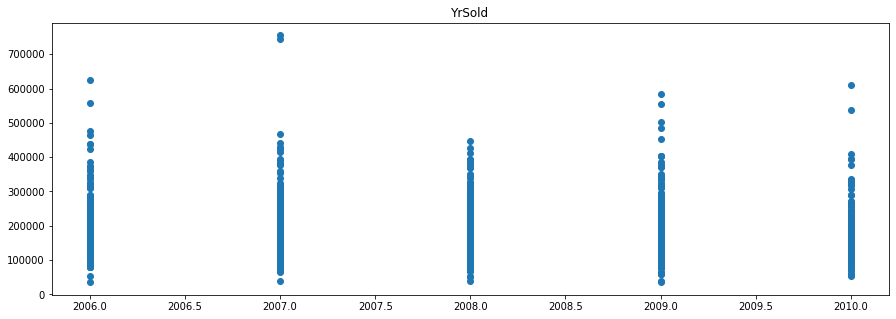

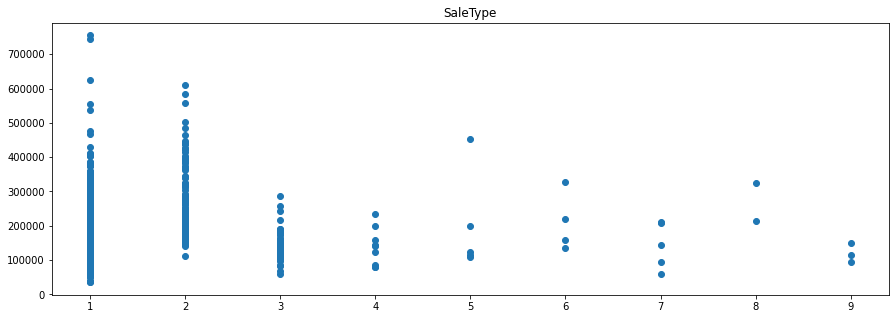

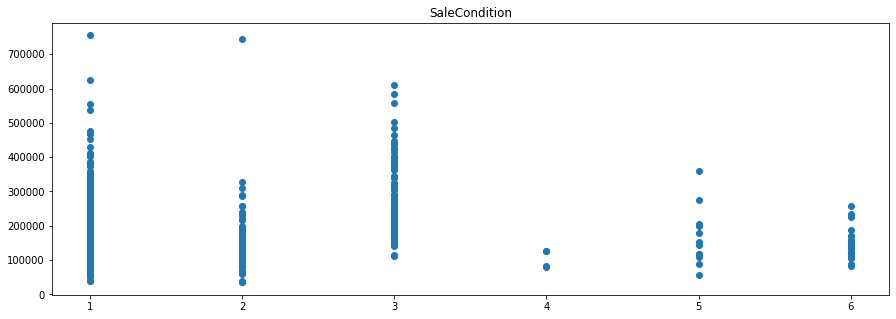

In [11]:
for i in X_values_new.columns:
    try:
        plt.figure(figsize = (15, 5))
        plt.title(i)
        plt.scatter(X_values_new[i], Y_values)
    except:
        pass

## Domain Knowledge - Evaluation
Based on domain knowledge it might be worth discussing which parameters I believe might play a large role when pricing real-estate assets.
* Zoning - definitely the function of the building is important for its pricing
* LotArea - the square footage of the property is probably the most important
* LandSlope - important for some technical requirements might increse the price of the propoperty due to geotechnical work
* Neighborhood - definitely a factor, location might increase the value with a 10s of percentage points or more
* House style - refers to number of floors and livable area so probably quite important 
* OverallQual - it can be seen from the data that the quality is proportional to price
* OverallCondition - also very important somewhat related to quality but probably not with a high correlation coefficient 
* YearBuilt - not as important as YearRemodelled
* ExteriorQuality - surprisingly small difference
* BsmtCond - quite a clear trend and also very important in general
* TotalBsmtSF - Total basement square feet very important but probably very highly correlated with square feet of floor 1, floor2 (also correlated but less with square footage of the lot area).
* HeatingQC - obvious trend
* CentralAir - good feature to have but less important
* Electrical - good feature to have but less important no data for some electric systems
* 1stFlrSF - high correlation to basement SF and 2nd SF but still good to have (PCA might deal with this issue)
* 2ndFlrSF - high correlation to basement SF and 1st SF but still good to have (PCA might deal with this issue)
* GrLivArea - good feature to have, need to check correlations
* FullBath - shows a decent linear trend
* TotRmsAbvGrd - Important and has a clear linear trend
* GarageYrBlt - Probably high correlation with year of construction of the house
* GarageCars - Number of cars to fit in the garage high correlation with area
* GarageArea - Probably not as big of a factor as the actual number of cars that can fit into the garage
* GarageQual - Less of an interest to potential buyers, probably only poor quality results in lower price
* WoodDeckSF - good additional feature, probably not highly correlated with other parameters, linited trend noticed
* OpenPorchSF - good feature not correlated with previous ones, noticed 
* EnclosedPorch - leave it in, even though not a major factor

In [12]:
features_selected_dataset = total_dataset_nnull[['MSSubClass', 'MSZoning' , 'LotFrontage', 'LotArea', 
     'LandSlope', 'Neighborhood', 'HouseStyle', 'OverallQual', 
     'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
     'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF', 
     'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
     'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
     'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']]

In [13]:
X_values, Y_values = features_selected_dataset.drop('SalePrice', axis = 1), features_selected_dataset['SalePrice']

In [14]:
training_data, testing_data = train_test_split(features_selected_dataset, test_size=0.2, random_state=25)

In [15]:
training_data = col_to_cat(training_data)
testing_data = col_to_cat(testing_data)

In [16]:
X_train, Y_train = training_data.drop('SalePrice', axis = 1), training_data['SalePrice'].to_numpy('float32')

In [17]:
X_test, Y_test = testing_data.drop('SalePrice', axis = 1), testing_data['SalePrice'].to_numpy('float32')

In [18]:
#scaler = preprocessing.MinMaxScaler()
#X_train = scaler.fit_transform(X_train.fillna(0))
#X_test = scaler.fit_transform(X_test.fillna(0))
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X_train)

      MSSubClass  MSZoning  LotFrontage  LotArea  LandSlope  Neighborhood  \
955           90       1.0         82.0     7136        1.0           1.0   
1278          60       2.0         75.0     9473        1.0           2.0   
667           20       2.0         65.0     8125        1.0           3.0   
543          120       1.0         34.0     4058        1.0           4.0   
1035          20       2.0          0.0    11500        1.0           5.0   
...          ...       ...          ...      ...        ...           ...   
1341          20       2.0         66.0    13695        1.0           3.0   
143           20       2.0         78.0    10335        1.0           2.0   
474          120       2.0         41.0     5330        1.0           7.0   
318           60       2.0         90.0     9900        2.0          19.0   
1156          80       2.0         85.0     9350        1.0           4.0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GrLivArea  \
95

In [19]:
model_new = tf.keras.Sequential([
    layers.Normalization(input_shape = (X_train.shape[1],), axis = -1),
    layers.Dense(units=10, activation = 'relu'),
    layers.Dense(units=1)])

model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 31)               63        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 394
Trainable params: 331
Non-trainable params: 63
_________________________________________________________________


In [20]:
def model_build(X_train, Y_train, learning_rate = 0.1, epochs = 2000, verbose = 0):
    time1 = time.time()
    model_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate), 
                  loss=tf.keras.metrics.mean_squared_error)


    history = model_new.fit(X_train, Y_train, epochs = epochs, verbose=verbose)

    plt.figure(figsize = (10,10))
    plt.title('learning rate = ' + str(learning_rate) + ' : Final Value - ' + "{:e}".format(history.history['loss'][0]))
    plt.plot(history.history['loss'])
    time2 = time.time()
    print(time2-time1)
    return history.history['loss'][0],history.history['loss'][-1]

5.544421195983887
1.624537e+09 1.609814e+09 -1.472294e+07


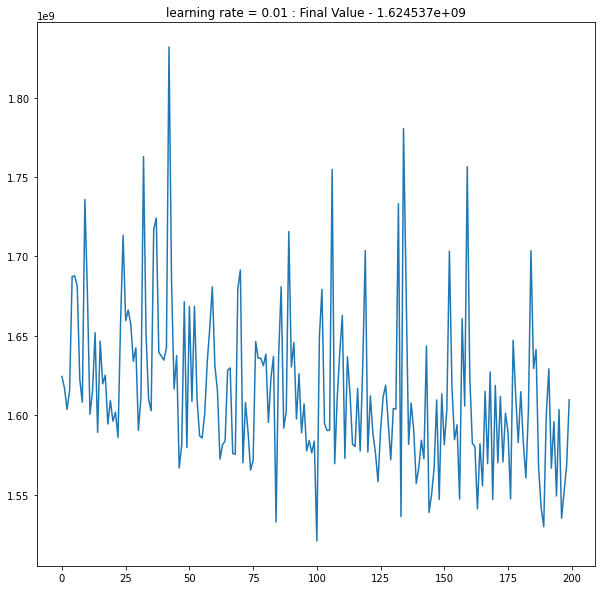

In [23]:
first_obj, last_obj = model_build(X_train, Y_train, learning_rate = 0.01, epochs = 200)
print( "{:e}".format(first_obj),"{:e}".format(last_obj), "{:e}".format(last_obj- first_obj))

## Some variables are expected to have high correlation

(116.1, 4909.9, -103.25, 2168.25)

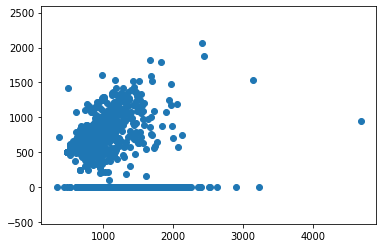

In [298]:
plt.scatter(X_values_new['1stFlrSF'], X_values_new['2ndFlrSF'])
plt.axis('equal')

In [305]:
from scipy.stats import pearsonr
print(np.cov(X_values_new['1stFlrSF'], X_values_new['2ndFlrSF']))
cor, _ = pearsonr(X_values_new['1stFlrSF'], X_values_new['2ndFlrSF'])
print(cor)

[[149450.07920371 -34197.86847578]
 [-34197.86847578 190557.0753373 ]]
-0.20264618100232315


In [309]:
cor_calc = pd.DataFrame([X_values_new['1stFlrSF'],  X_values_new['2ndFlrSF']]).T

(156.0, 4908.0, 12.25, 2162.75)

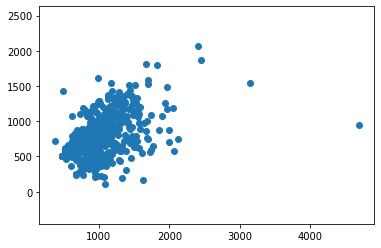

In [319]:
nozero_cor = cor_calc[cor_calc['2ndFlrSF'] != 0]
plt.scatter(nozero_cor['1stFlrSF'], nozero_cor['2ndFlrSF'])
plt.axis('equal')

In [ ]:
first_obj

In [320]:
print(np.cov(nozero_cor['1stFlrSF'], nozero_cor['2ndFlrSF']))
cor, _ = pearsonr(nozero_cor['1stFlrSF'], nozero_cor['2ndFlrSF'])
print(cor) 

[[120480.95837295  41389.44155158]
 [ 41389.44155158  74718.56002817]]
0.43623058660059805


Looks fine, the correlation isn't too large, probably only living spaces are taken into account and the floor distribution is different, therefore both features should be kept.

# Insufficient data
These parameters lack enough data or have too many np.nan entries in order to be modeled.

In [218]:
total_dataset_nnull.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [219]:
total_dataset_nnull = total_dataset_nnull.drop(['Id', 'Alley', 'Utilities', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold'], axis = 1)

## Conditional probabilities
Some parameters are conditioned on others. It might be worth exploring models that are explicitly build for conditional probabilities in the input space. Because of conditioning tree based algorithms might be a good option in general.

In [220]:
#total_dataset_nnull.drop(['Condition2', 'Exterior2nd'], axis = 1)

In [221]:
training_data, testing_data = train_test_split(total_dataset_nnull, test_size=0.2, random_state=25)

In [223]:
training_data_new, training_data_old = col_to_cat(training_data)

In [224]:
testing_data_new, testing_data_old = col_to_cat(testing_data)

In [225]:
X_train, Y_train = training_data_new.drop('SalePrice', axis = 1), training_data_new['SalePrice']
X_test, Y_test = testing_data_new.drop('SalePrice', axis = 1), testing_data_new['SalePrice']
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train.fillna(0))
X_test = scaler.fit_transform(X_test.fillna(0))

In [226]:
X_train

array([[0.41176471, 0.        , 0.26198083, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.25      , 0.23961661, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.20766773, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58823529, 0.25      , 0.13099042, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.25      , 0.28753994, ..., 0.        , 0.        ,
        0.        ],
       [0.35294118, 0.25      , 0.2715655 , ..., 0.        , 0.        ,
        0.        ]])

In [272]:
regression =  Ridge(max_iter = 1000, 
                    solver = 'saga')
regression.fit(X_train, Y_train)
no_pca = regression.score(X_test, Y_test)
no_pca

0.16481029066484254

In [292]:
def pca_linear(n_comp):
    pca = PCA(n_components=n_comp, svd_solver = 'full')
    principalComponents = pca.fit_transform(X_train)
    train_X_PCA = pd.DataFrame(data = principalComponents)

    pca = PCA(n_components=train_X_PCA.shape[1], svd_solver = 'full')
    principalComponents = pca.fit_transform(X_test)
    test_X_PCA = pd.DataFrame(data = principalComponents)

    regression = Ridge(max_iter = 1000, solver = 'saga')
    regression.fit(train_X_PCA, Y_train)
    
    #Y_pred = regression.predict(test_X_PCA)
    #np.sum((Y_pred-Y_test)**2)/len(Y_test)
    return regression.score(test_X_PCA, Y_test), np.sum((Y_test - Y_pred)**2)/len(Y_pred)


In [293]:
pca_linear('mle')

(-2.083330477628443, 3.35454383027511e+32)

In [275]:
scores = [pca_linear(n_comp) for n_comp in range(1,40)]

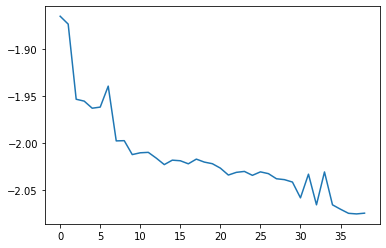

In [276]:
plt.plot(np.array(scores).T[0])

In [243]:
n_comp = 15
pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(X_train)
train_X_PCA = pd.DataFrame(data = principalComponents)

pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(X_test)
test_X_PCA = pd.DataFrame(data = principalComponents)

In [244]:
modelPCA = tf.keras.Sequential([
    layers.Normalization(input_shape= [n_comp,], axis=-1),
    layers.Dense(units=1)])

modelPCA.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 15)               31        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 47
Trainable params: 16
Non-trainable params: 31
_________________________________________________________________


In [264]:
modelPCA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.5), 
              loss=tf.keras.metrics.mean_squared_error)

In [265]:
history_n = modelPCA.fit(train_X_PCA,
    Y_train,
    epochs=1000,
    verbose=1)

Epoch 1/1000
37/37 [==============================] - 0s 889us/step - loss: 1420950016.0000
Epoch 2/1000
37/37 [==============================] - 0s 917us/step - loss: 1420942976.0000
Epoch 3/1000
37/37 [==============================] - 0s 861us/step - loss: 1420942848.0000
Epoch 4/1000
37/37 [==============================] - 0s 833us/step - loss: 1420945664.0000
Epoch 5/1000
37/37 [==============================] - 0s 834us/step - loss: 1420943360.0000
Epoch 6/1000
37/37 [==============================] - 0s 833us/step - loss: 1420944768.0000
Epoch 7/1000
37/37 [==============================] - 0s 917us/step - loss: 1420945664.0000
Epoch 8/1000
37/37 [==============================] - 0s 917us/step - loss: 1420938752.0000
Epoch 9/1000
37/37 [==============================] - 0s 861us/step - loss: 1420950272.0000
Epoch 10/1000
37/37 [==============================] - 0s 972us/step - loss: 1420946176.0000
Epoch 11/1000
37/37 [==============================] - 0s 861us/step - loss: 14

37/37 [==============================] - 0s 750us/step - loss: 1420940288.0000
Epoch 177/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941184.0000
Epoch 178/1000
37/37 [==============================] - 0s 833us/step - loss: 1420941696.0000
Epoch 179/1000
37/37 [==============================] - 0s 806us/step - loss: 1420940416.0000
Epoch 180/1000
37/37 [==============================] - 0s 861us/step - loss: 1420938368.0000
Epoch 181/1000
37/37 [==============================] - 0s 861us/step - loss: 1420941056.0000
Epoch 182/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941184.0000
Epoch 183/1000
37/37 [==============================] - 0s 806us/step - loss: 1420942848.0000
Epoch 184/1000
37/37 [==============================] - 0s 778us/step - loss: 1420937344.0000
Epoch 185/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941440.0000
Epoch 186/1000
37/37 [==============================] - 0s 722us/step - los

37/37 [==============================] - 0s 1ms/step - loss: 1420944768.0000
Epoch 351/1000
37/37 [==============================] - 0s 917us/step - loss: 1420934784.0000
Epoch 352/1000
37/37 [==============================] - 0s 833us/step - loss: 1420942848.0000
Epoch 353/1000
37/37 [==============================] - 0s 861us/step - loss: 1420938496.0000
Epoch 354/1000
37/37 [==============================] - 0s 889us/step - loss: 1420936320.0000
Epoch 355/1000
37/37 [==============================] - 0s 806us/step - loss: 1420938496.0000
Epoch 356/1000
37/37 [==============================] - 0s 778us/step - loss: 1420947328.0000
Epoch 357/1000
37/37 [==============================] - 0s 750us/step - loss: 1420939136.0000
Epoch 358/1000
37/37 [==============================] - 0s 806us/step - loss: 1420940416.0000
Epoch 359/1000
37/37 [==============================] - 0s 806us/step - loss: 1420938368.0000
Epoch 360/1000
37/37 [==============================] - 0s 833us/step - loss:

37/37 [==============================] - 0s 778us/step - loss: 1420935680.0000
Epoch 525/1000
37/37 [==============================] - 0s 722us/step - loss: 1420938240.0000
Epoch 526/1000
37/37 [==============================] - 0s 722us/step - loss: 1420936960.0000
Epoch 527/1000
37/37 [==============================] - 0s 750us/step - loss: 1420935552.0000
Epoch 528/1000
37/37 [==============================] - 0s 722us/step - loss: 1420939136.0000
Epoch 529/1000
37/37 [==============================] - 0s 750us/step - loss: 1420939264.0000
Epoch 530/1000
37/37 [==============================] - 0s 722us/step - loss: 1420932608.0000
Epoch 531/1000
37/37 [==============================] - 0s 695us/step - loss: 1420941952.0000
Epoch 532/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933376.0000
Epoch 533/1000
37/37 [==============================] - 0s 722us/step - loss: 1420934784.0000
Epoch 534/1000
37/37 [==============================] - 0s 806us/step - los

37/37 [==============================] - 0s 750us/step - loss: 1420934400.0000
Epoch 699/1000
37/37 [==============================] - 0s 750us/step - loss: 1420936704.0000
Epoch 700/1000
37/37 [==============================] - 0s 695us/step - loss: 1420937472.0000
Epoch 701/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933888.0000
Epoch 702/1000
37/37 [==============================] - 0s 722us/step - loss: 1420933632.0000
Epoch 703/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933760.0000
Epoch 704/1000
37/37 [==============================] - 0s 695us/step - loss: 1420936704.0000
Epoch 705/1000
37/37 [==============================] - 0s 778us/step - loss: 1420945536.0000
Epoch 706/1000
37/37 [==============================] - 0s 722us/step - loss: 1420935040.0000
Epoch 707/1000
37/37 [==============================] - 0s 806us/step - loss: 1420937216.0000
Epoch 708/1000
37/37 [==============================] - 0s 750us/step - los

37/37 [==============================] - 0s 1ms/step - loss: 1420938368.0000
Epoch 873/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420932224.0000
Epoch 874/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420943104.0000
Epoch 875/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420931968.0000
Epoch 876/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420947200.0000
Epoch 877/1000
37/37 [==============================] - 0s 972us/step - loss: 1420937728.0000
Epoch 878/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420938112.0000
Epoch 879/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420944896.0000
Epoch 880/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420937472.0000
Epoch 881/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420933632.0000
Epoch 882/1000
37/37 [==============================] - 0s 972us/step - loss: 1420934528.0000

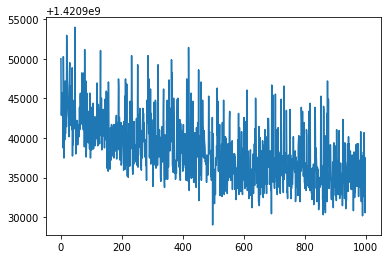

In [266]:
plt.plot(history.history['loss'])

In [32]:
import xgboost as xgb

In [33]:
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)

In [34]:
xg_reg = xgb.XGBRegressor()

In [35]:
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [37]:
preds = xg_reg.predict(X_test)

In [38]:
np.sum((np.array(Y_test) - preds)**2)/len(preds)

3865930201.870016

In [39]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001E526E39700>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

C:\Users\sboyukliyski\AppData\Local\Temp\ipykernel_11796\492925393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15, 5))


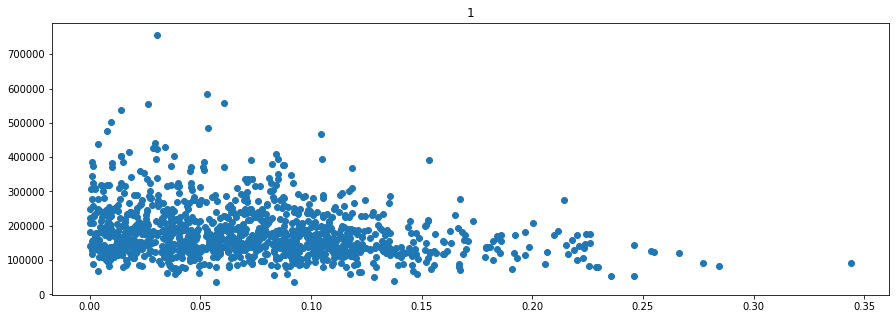

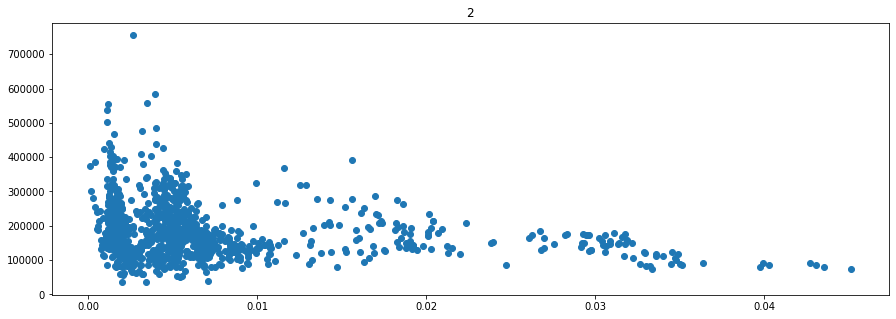

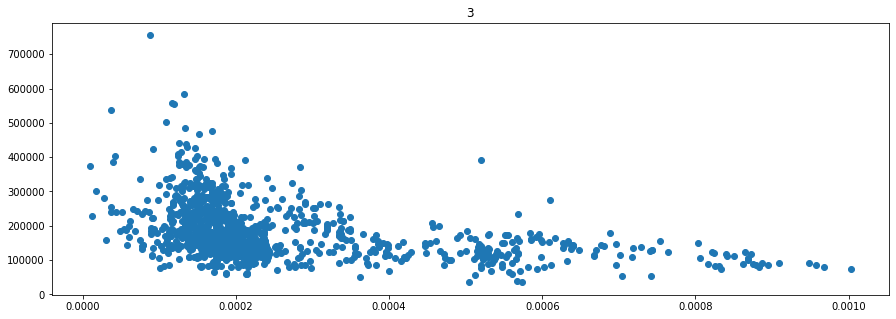

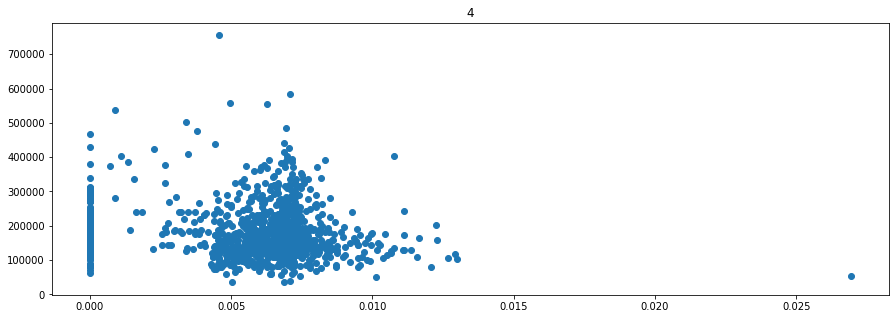

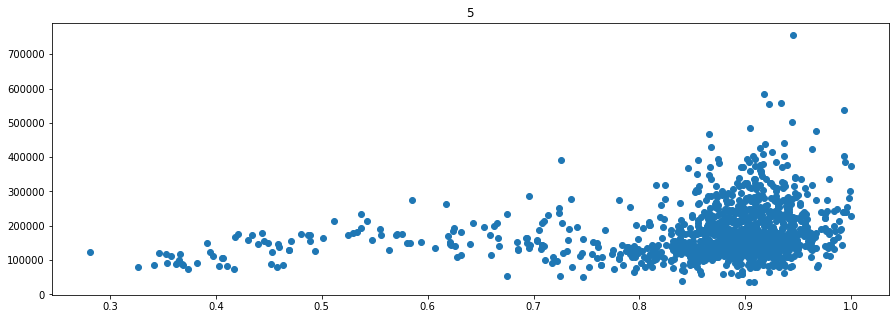

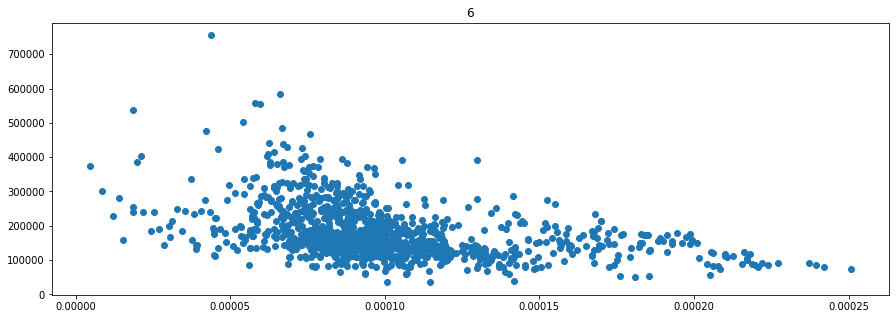

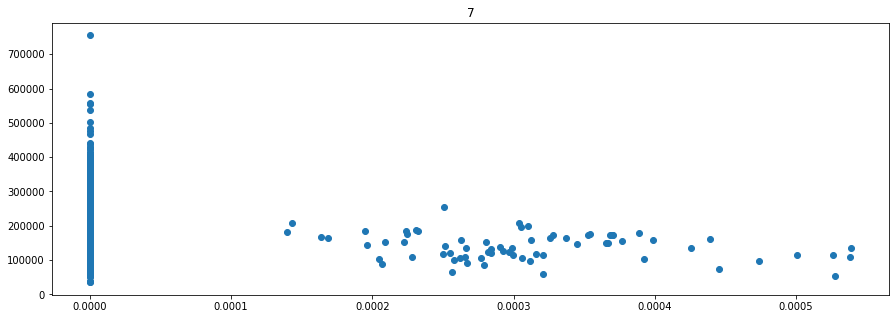

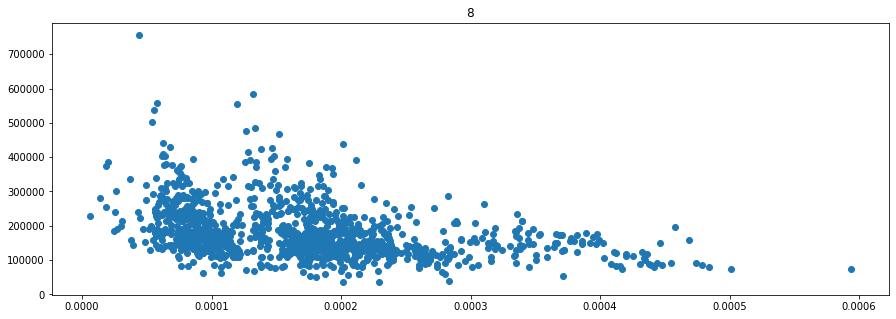

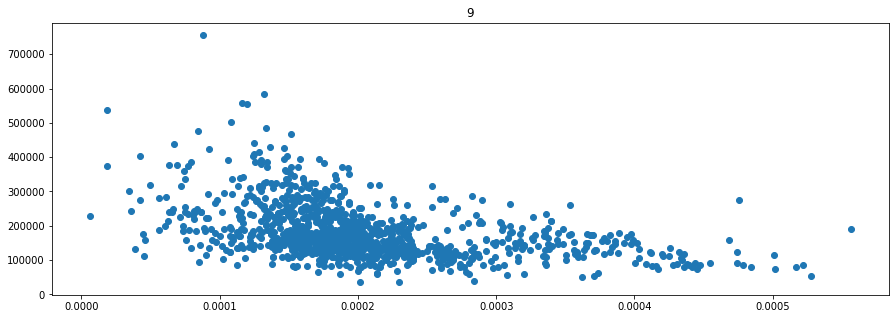

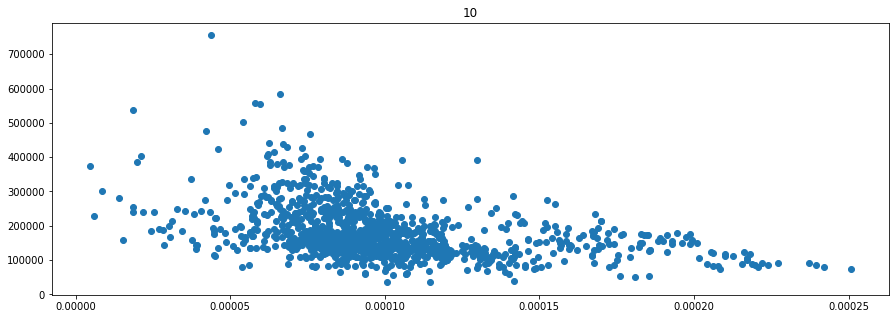

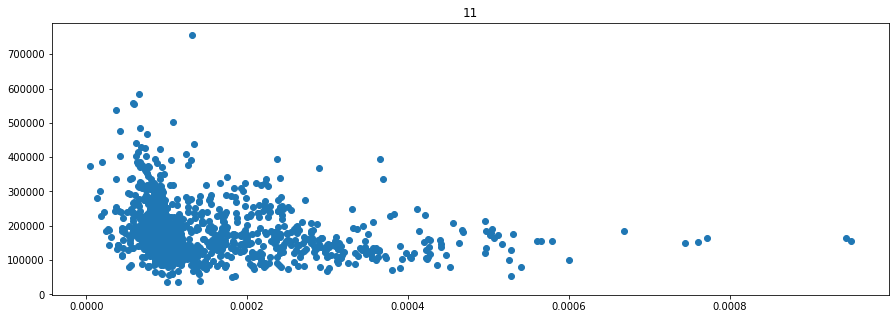

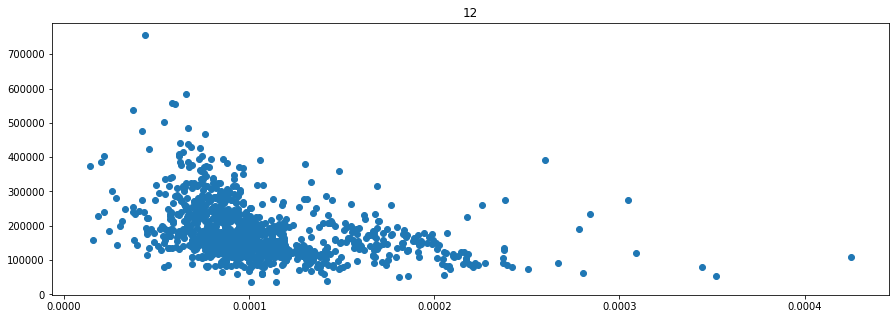

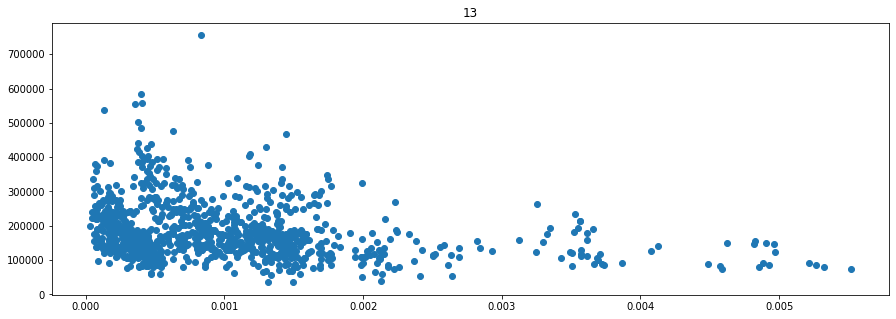

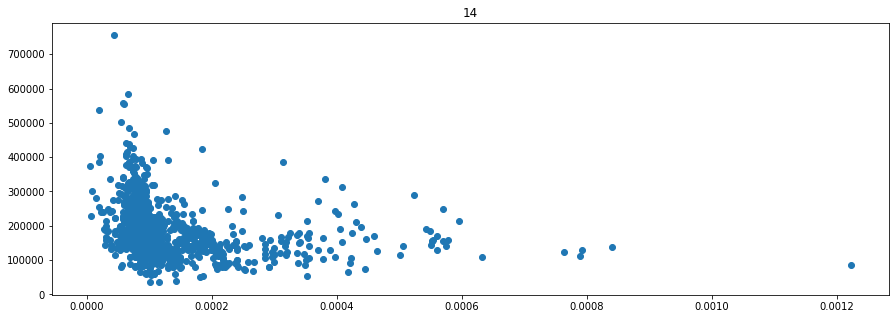

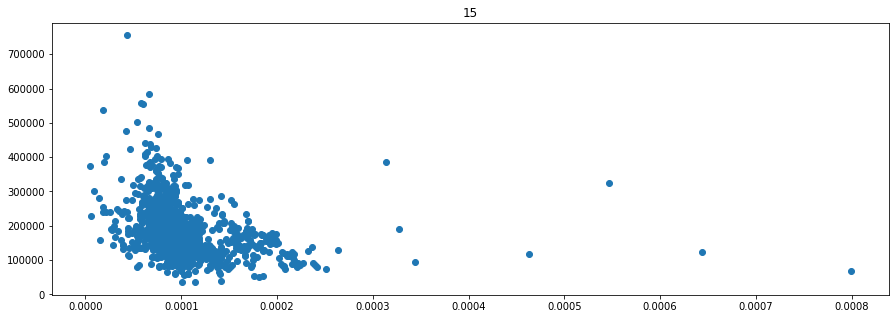

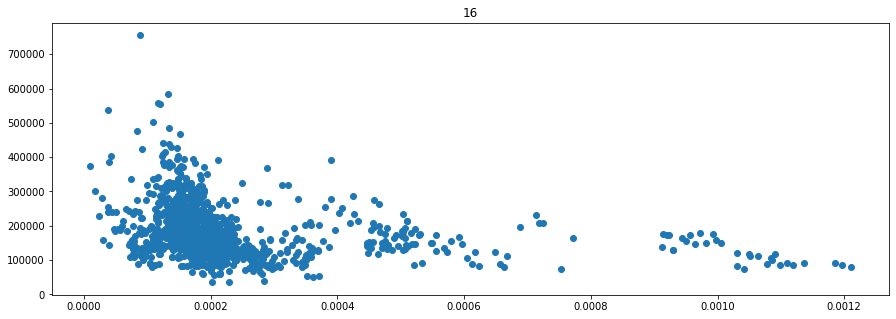

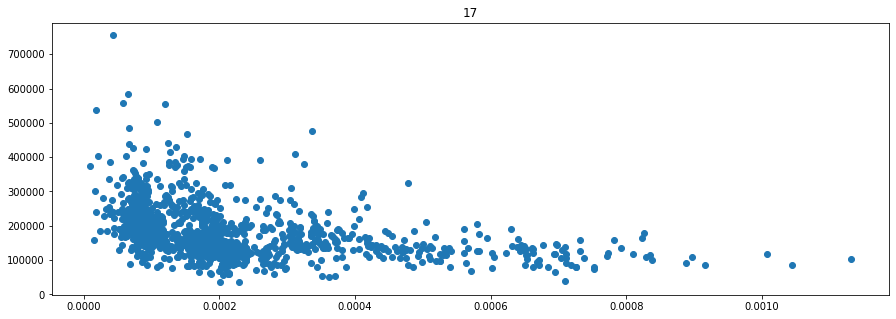

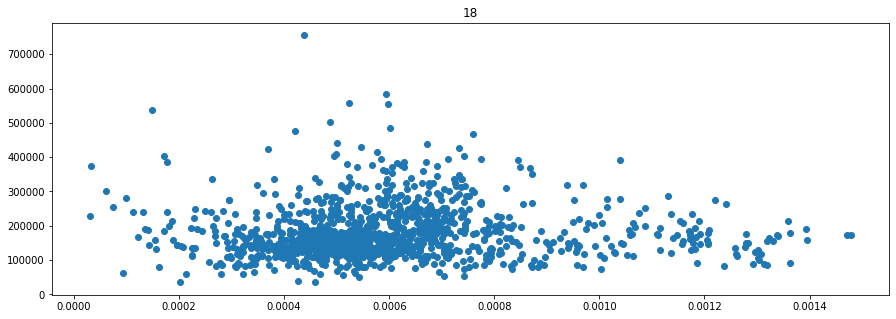

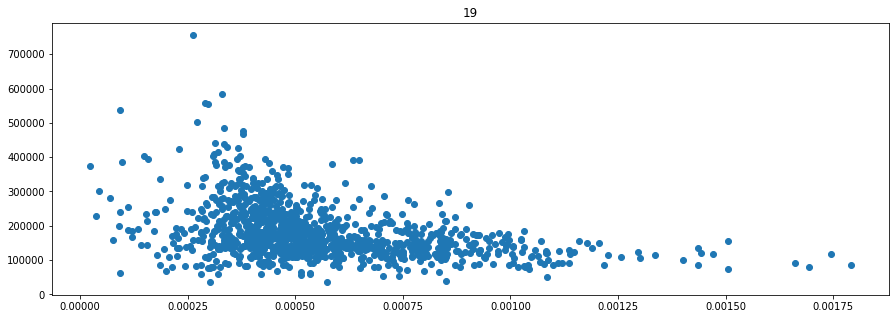

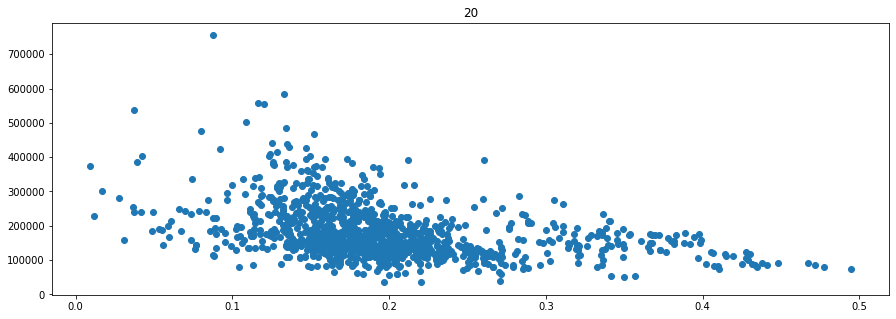

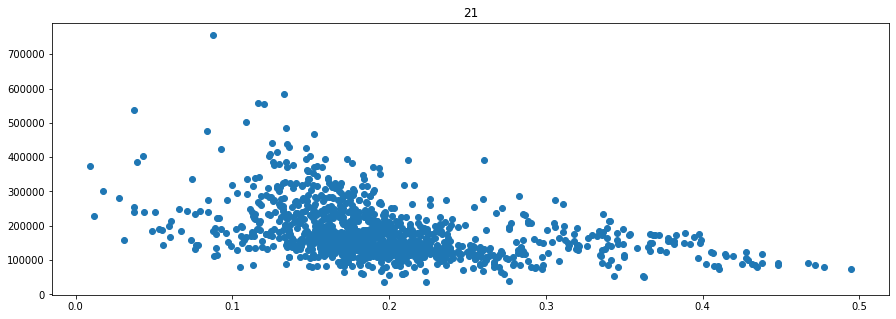

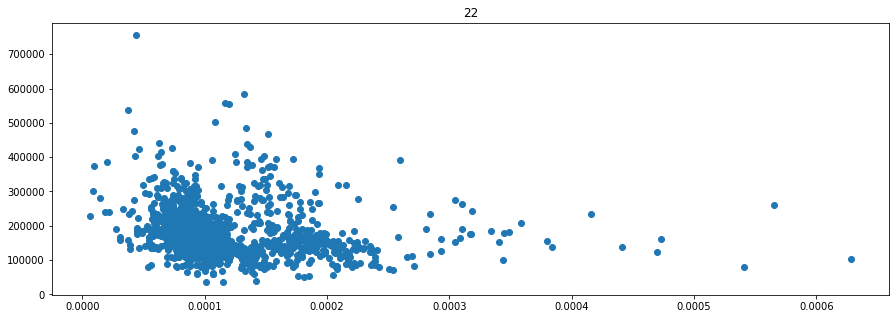

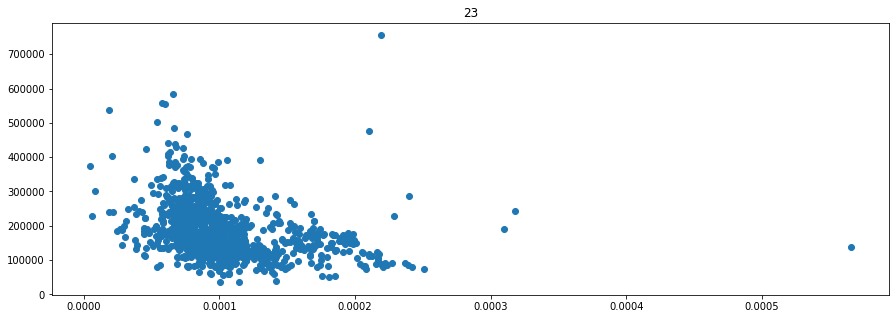

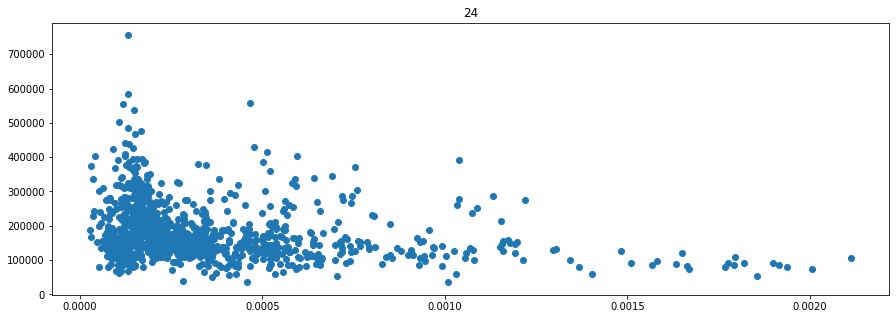

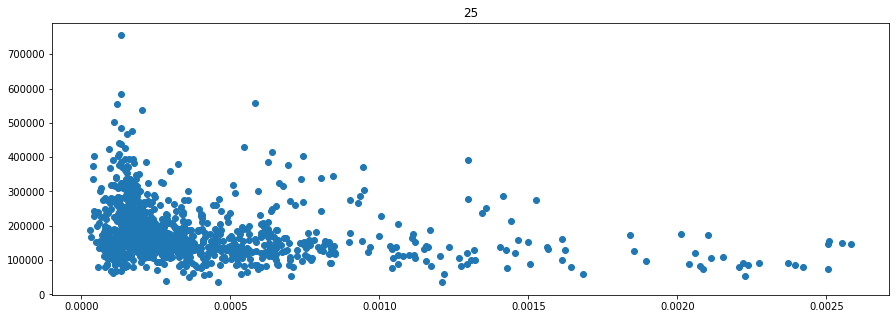

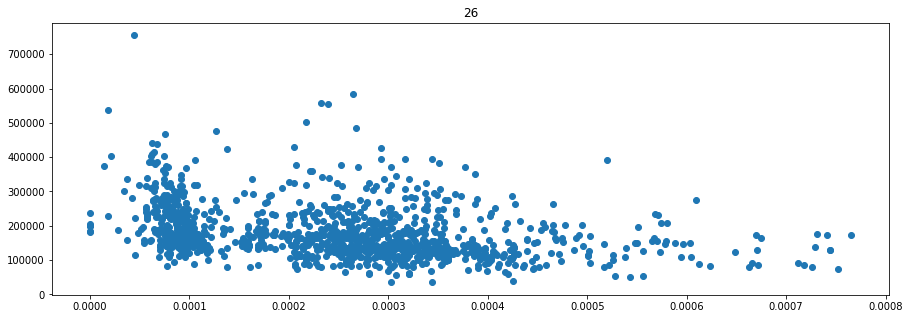

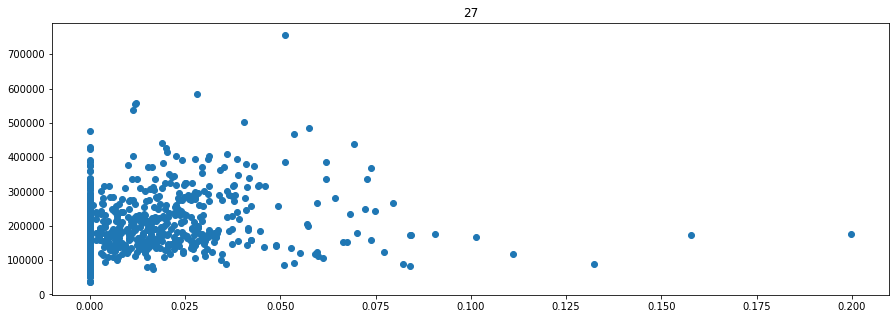

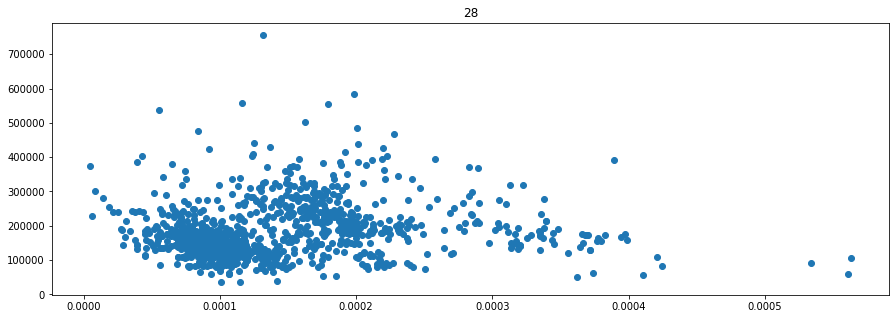

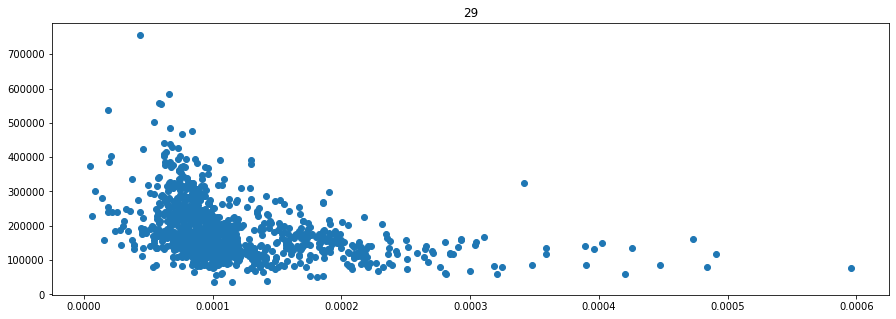

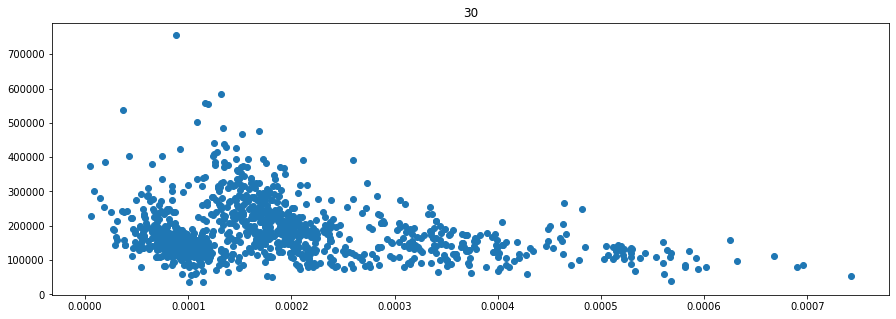

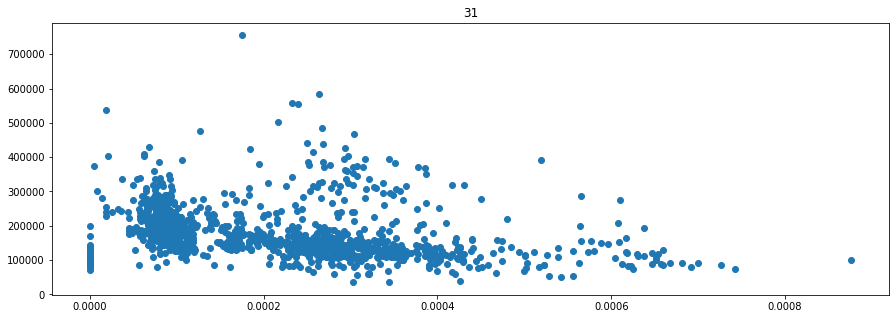

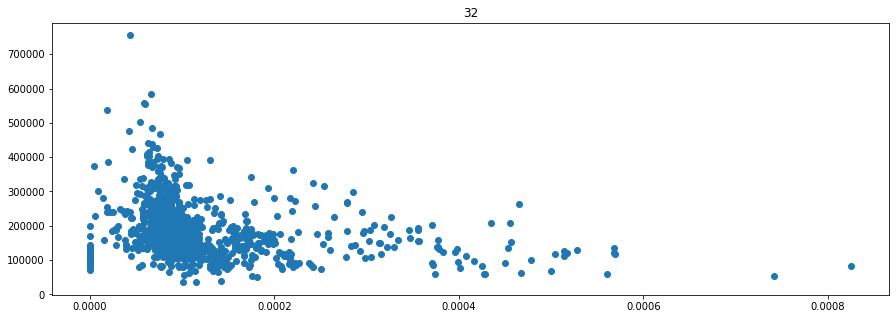

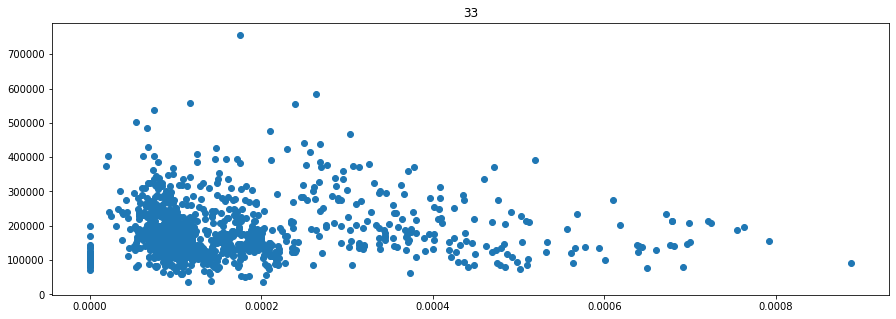

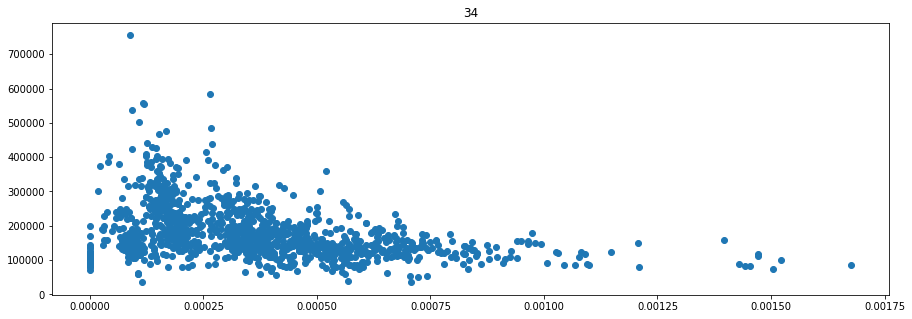

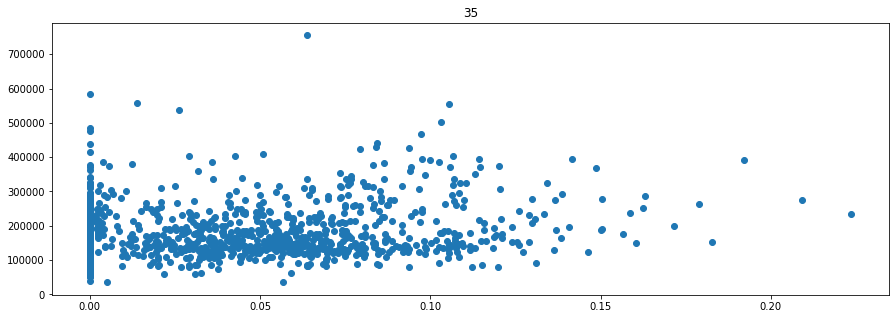

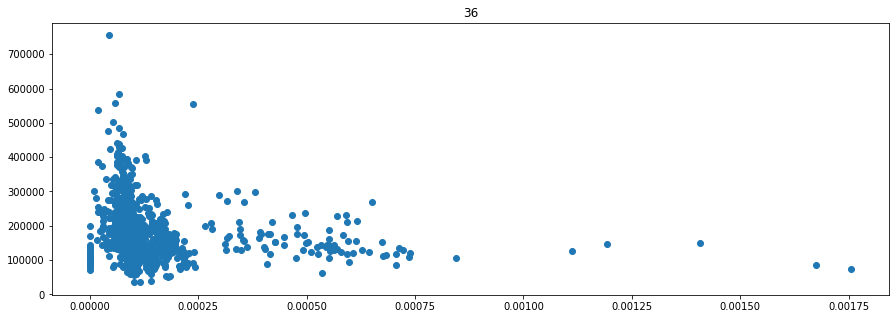

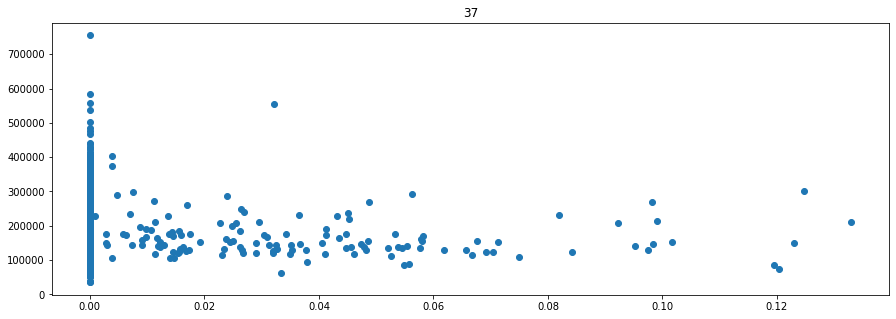

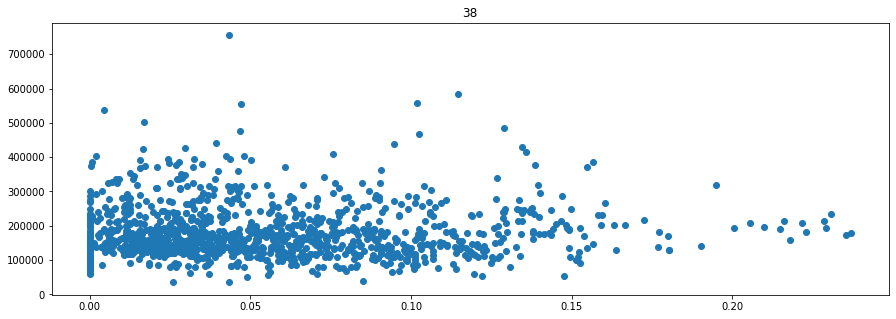

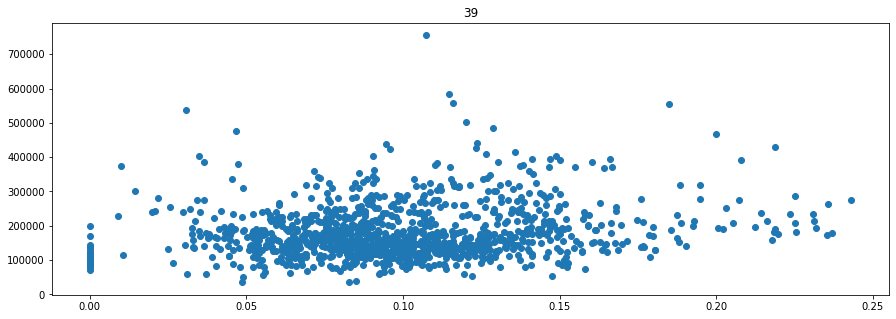

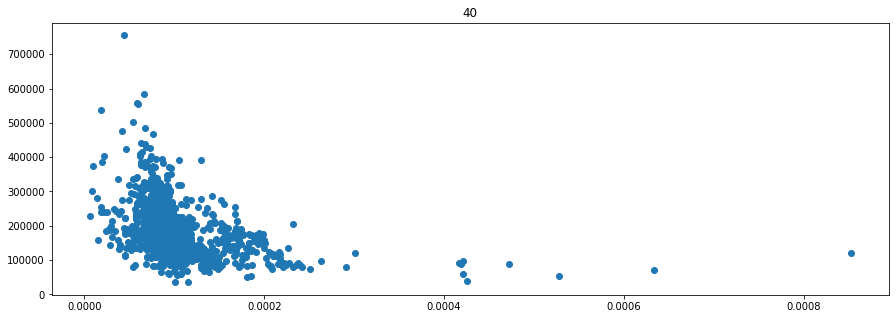

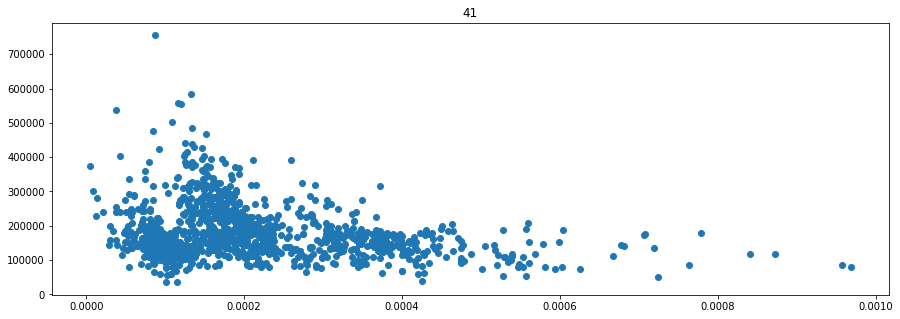

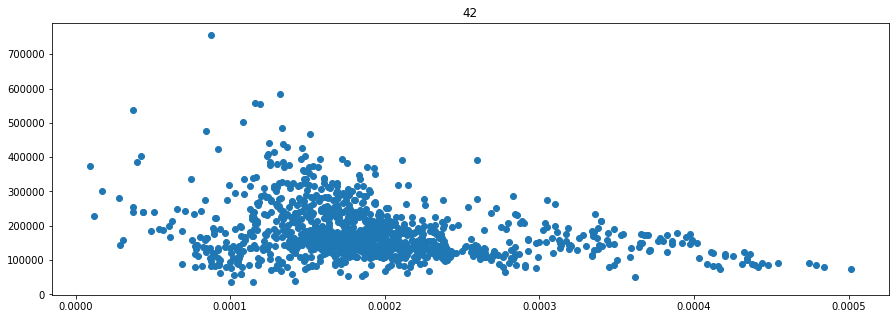

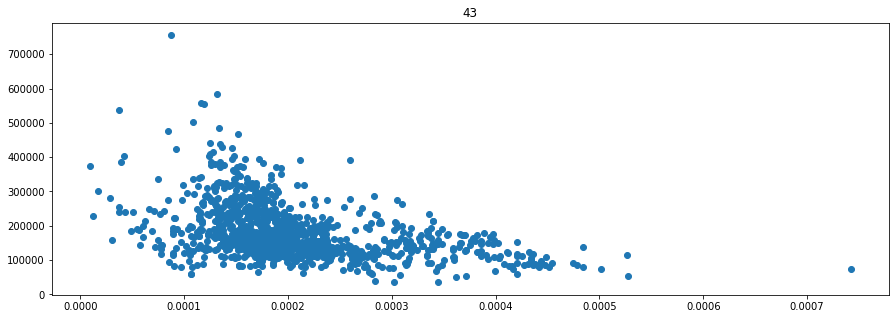

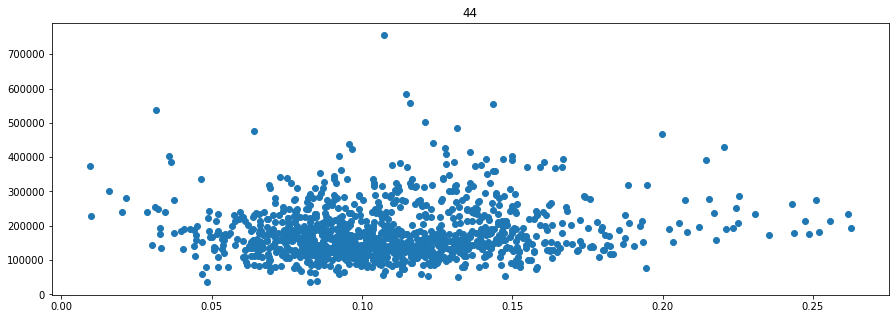

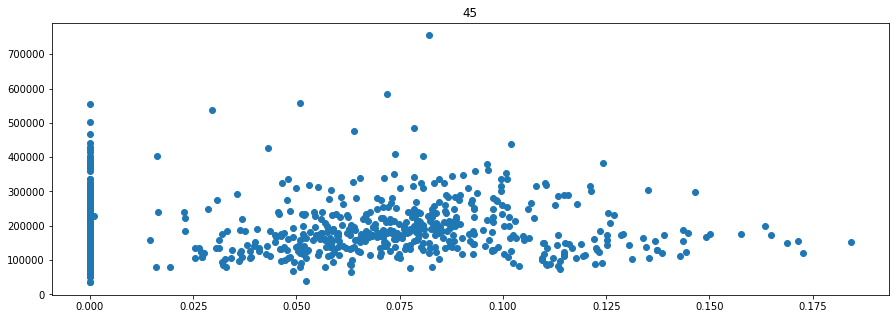

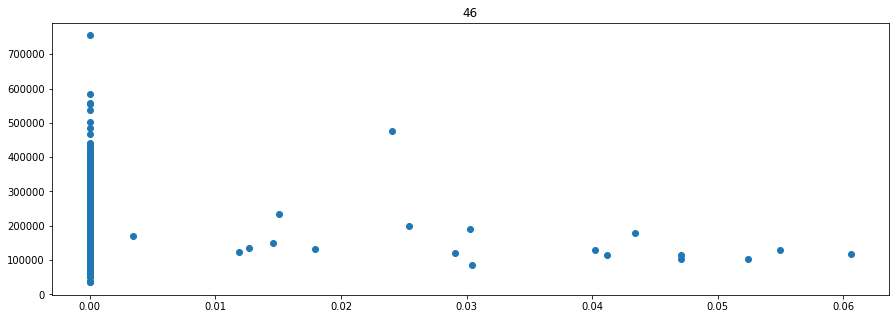

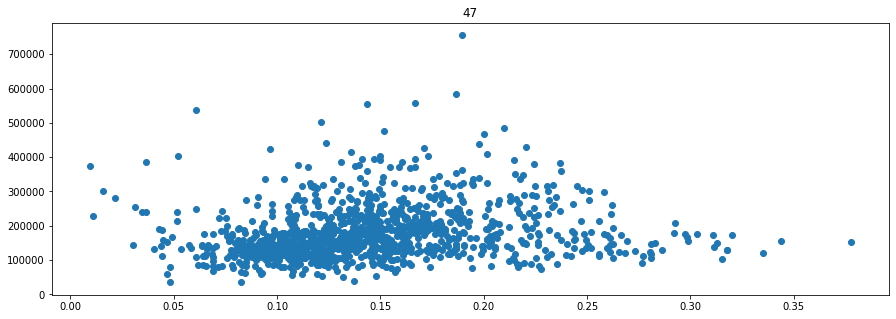

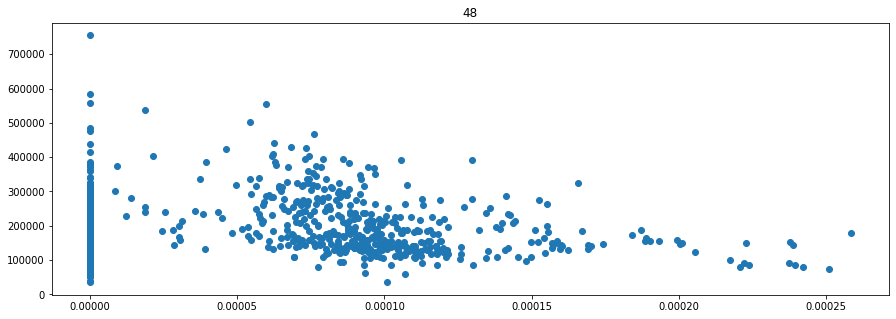

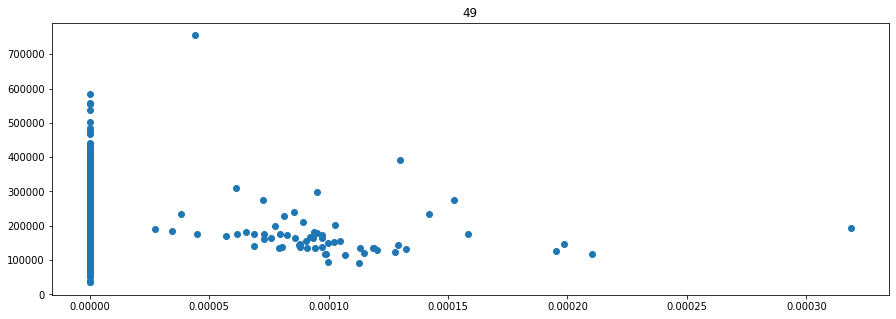

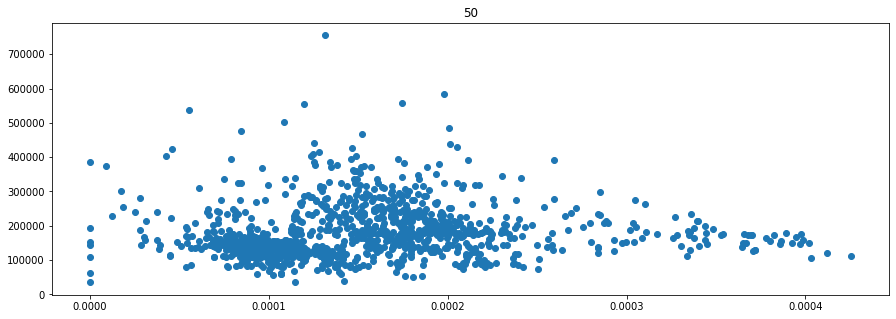

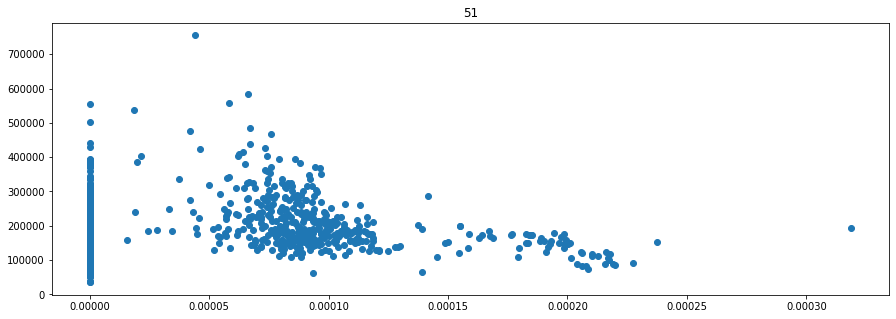

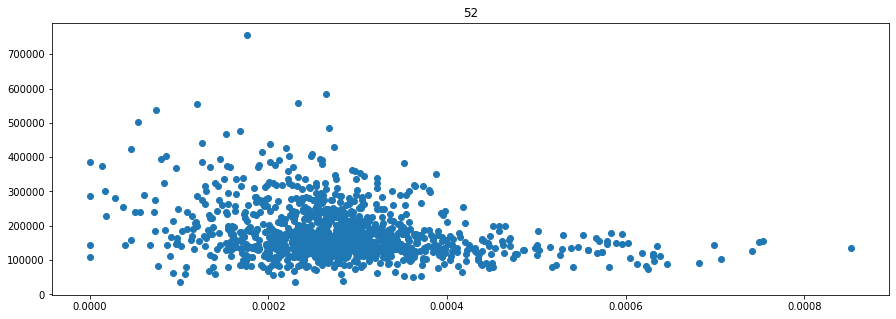

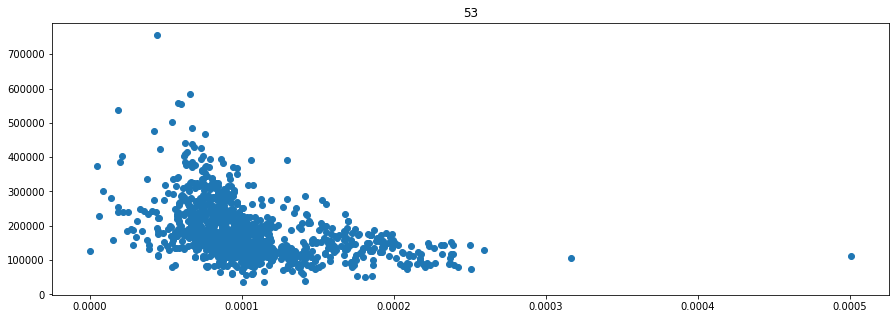

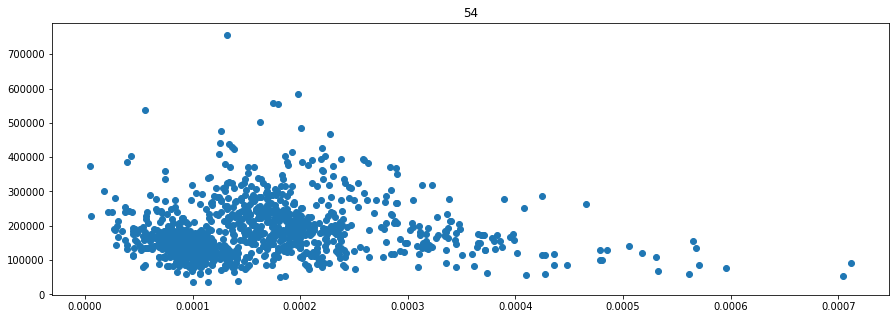

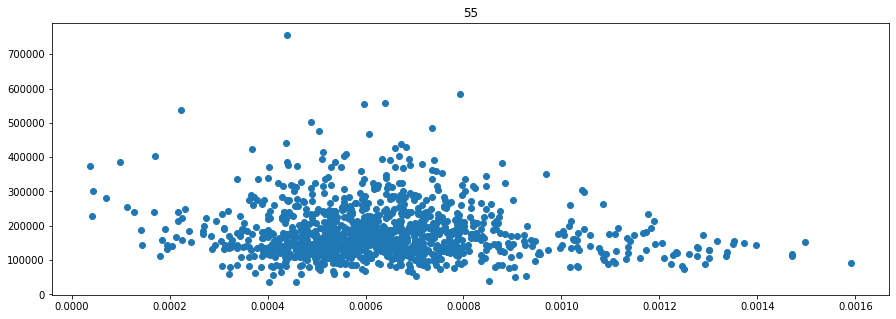

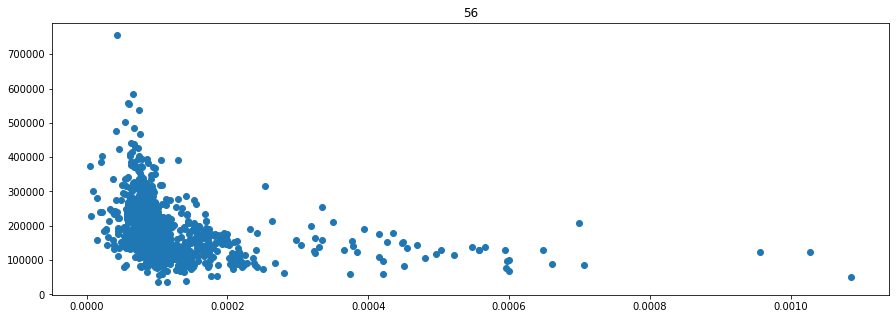

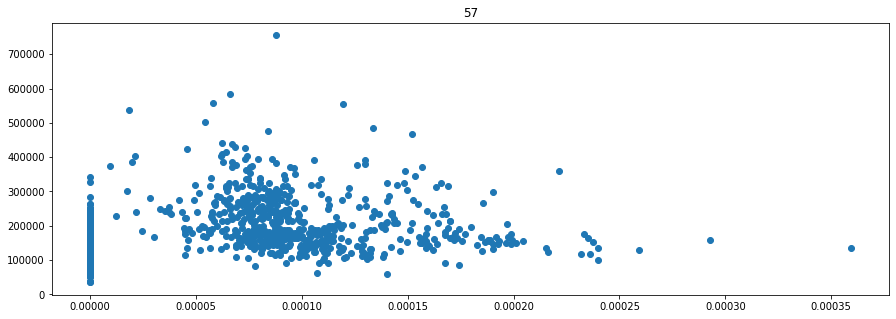

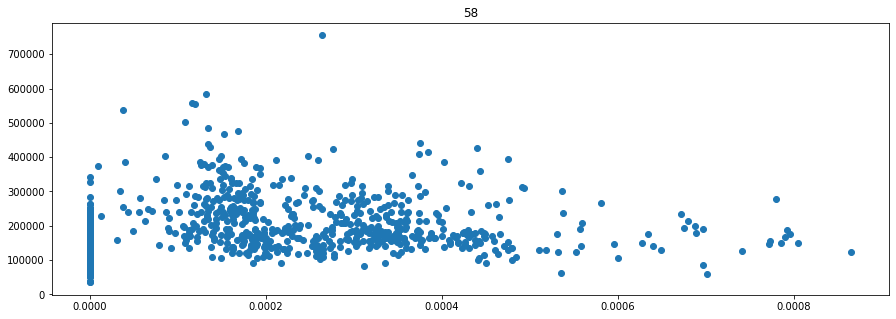

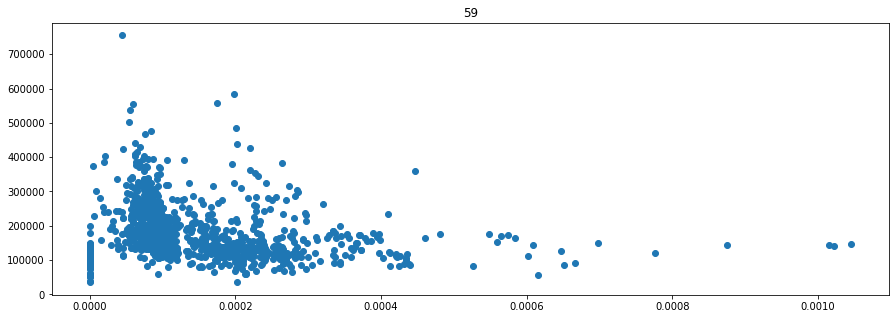

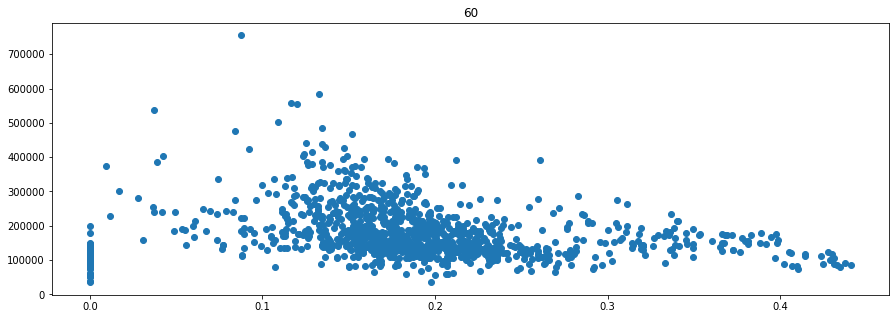

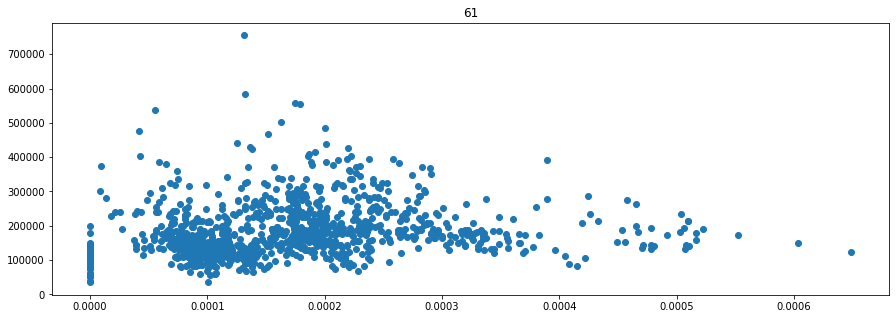

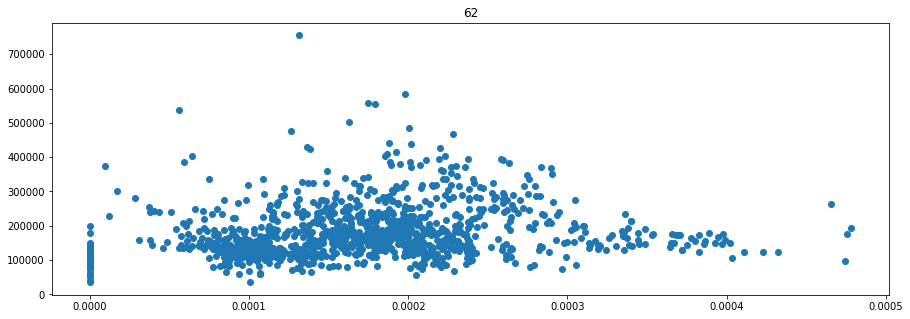

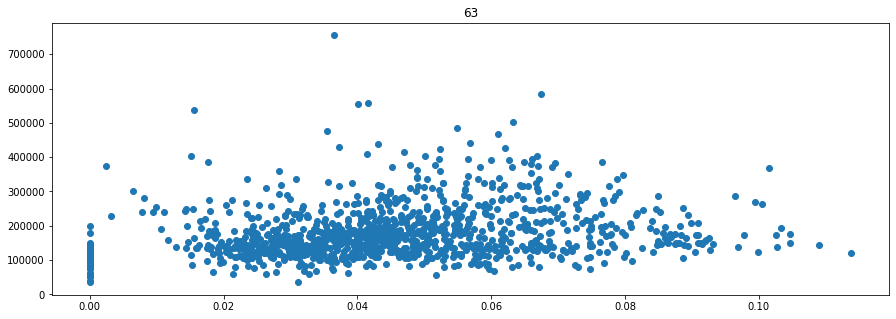

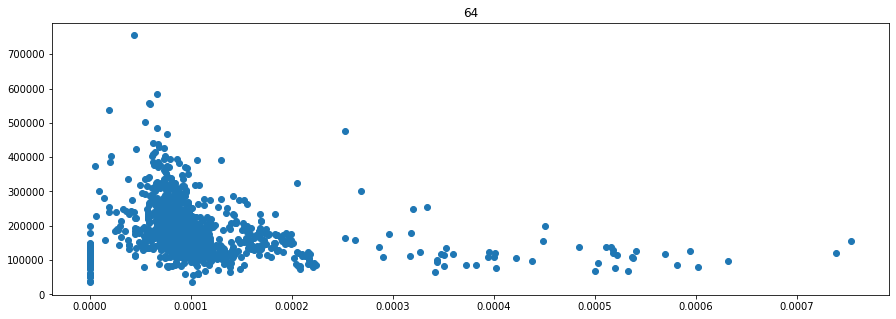

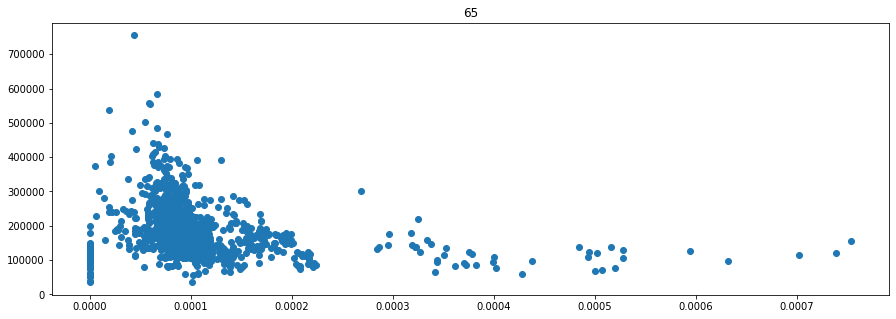

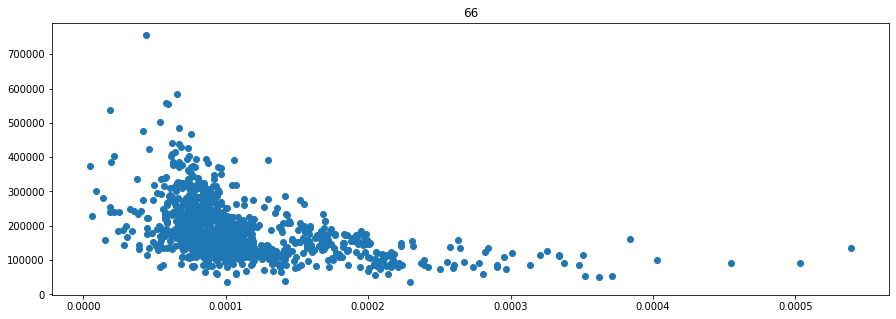

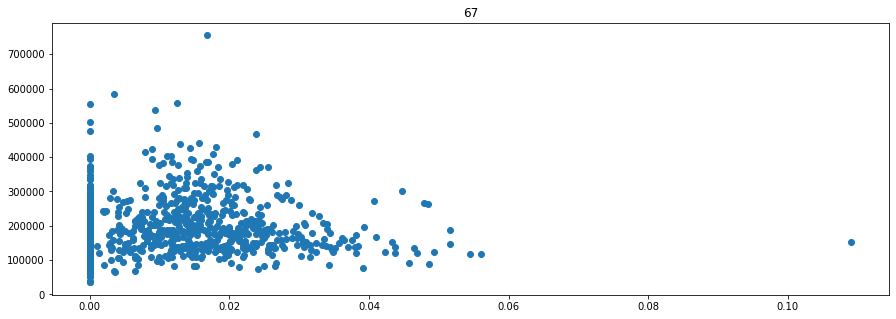

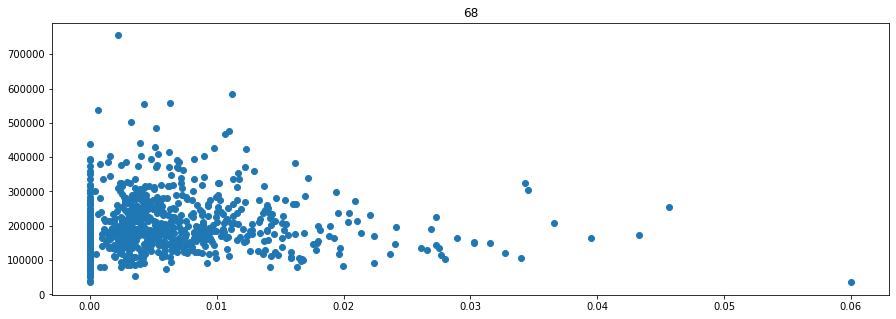

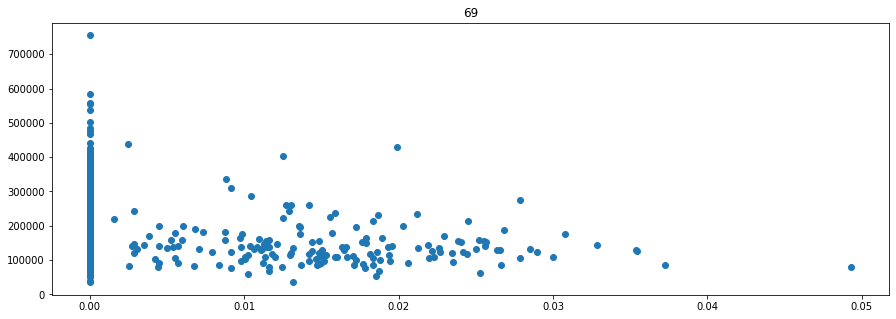

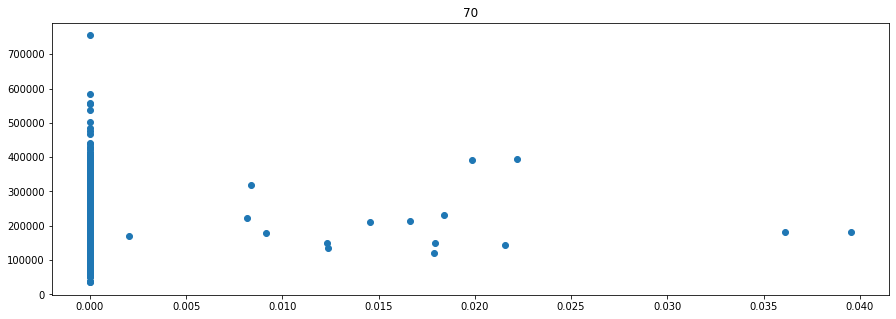

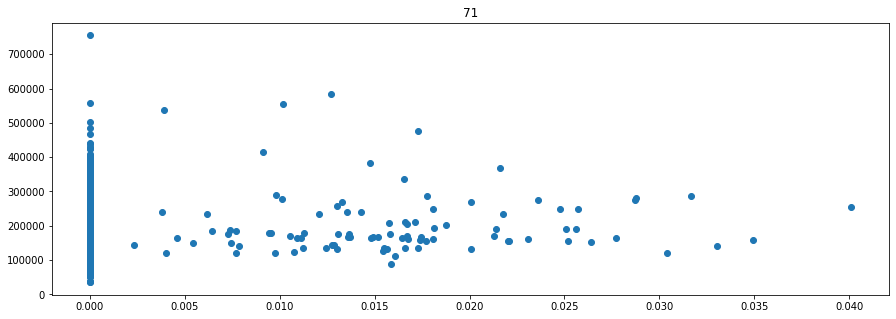

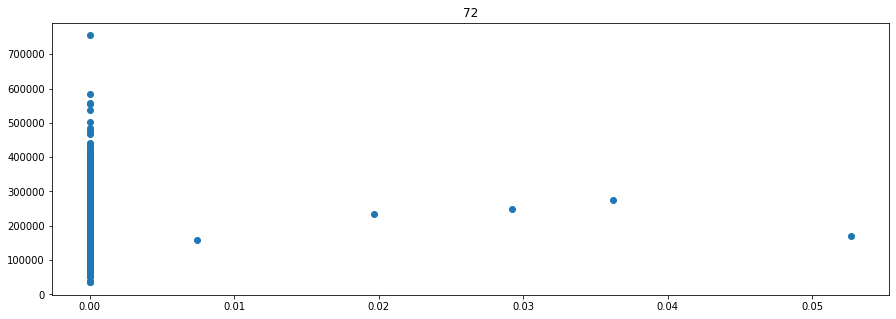

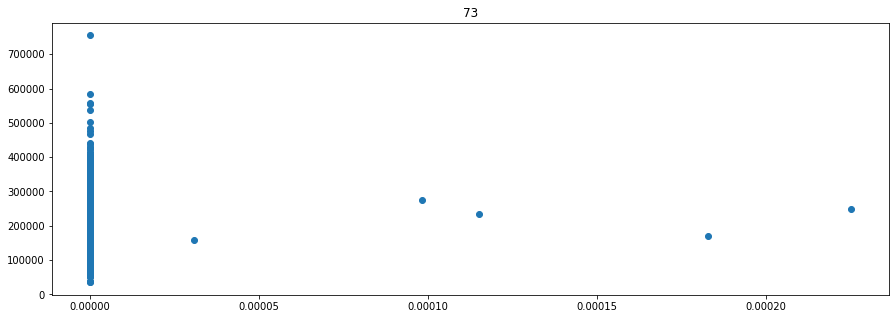

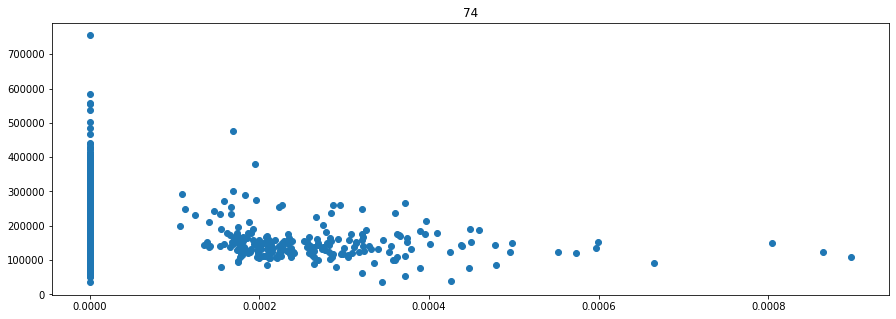

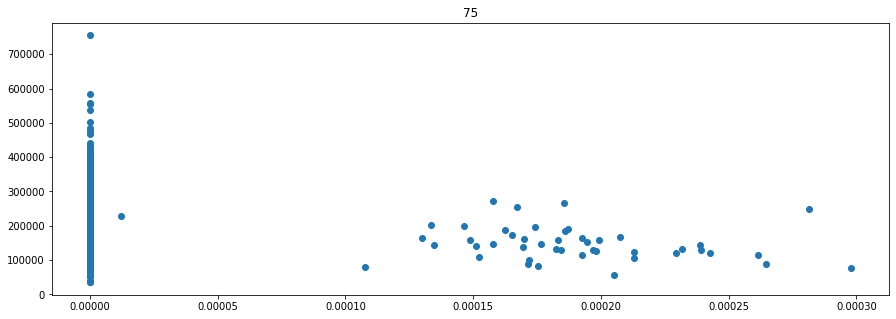

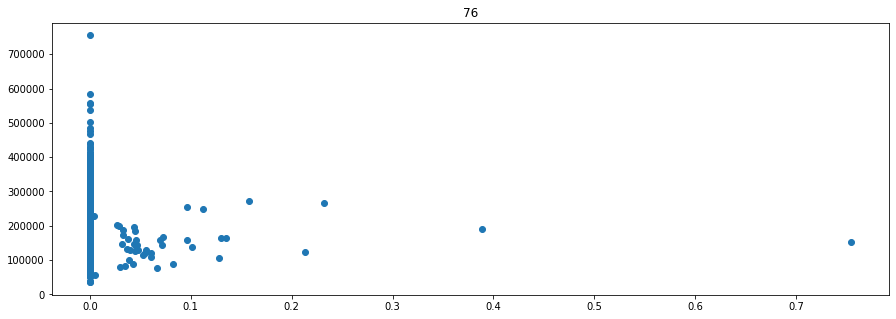

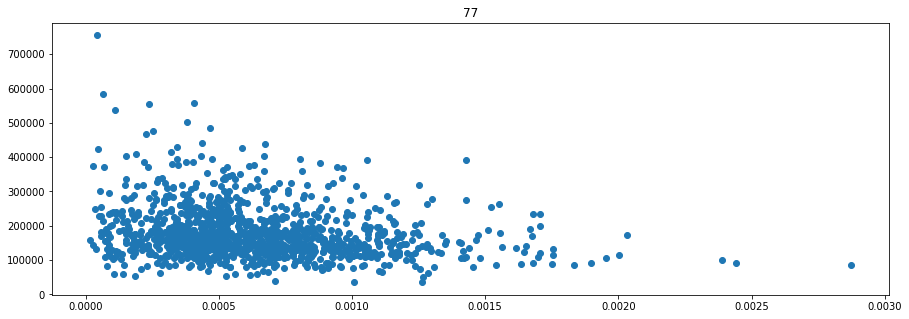

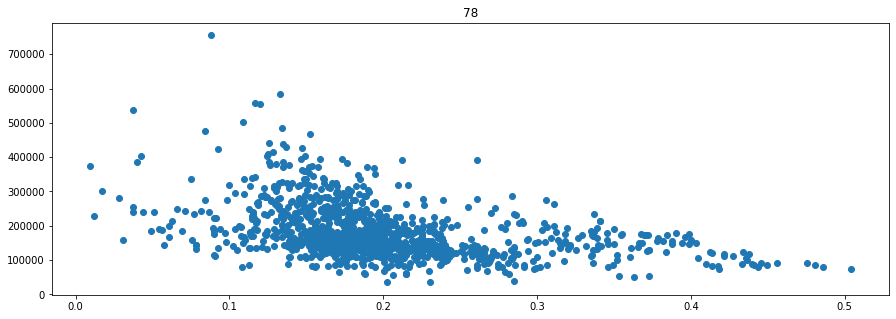

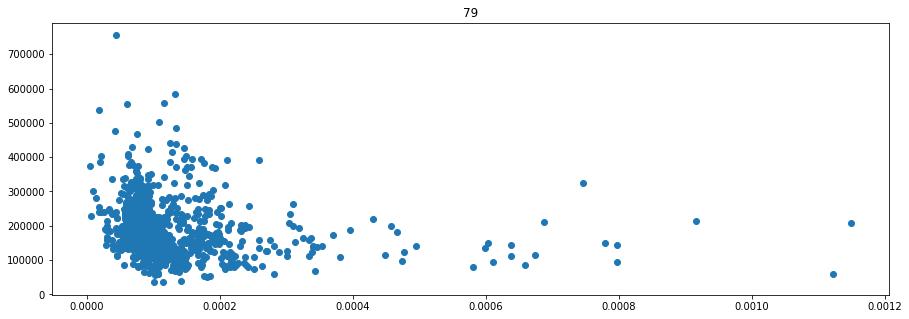

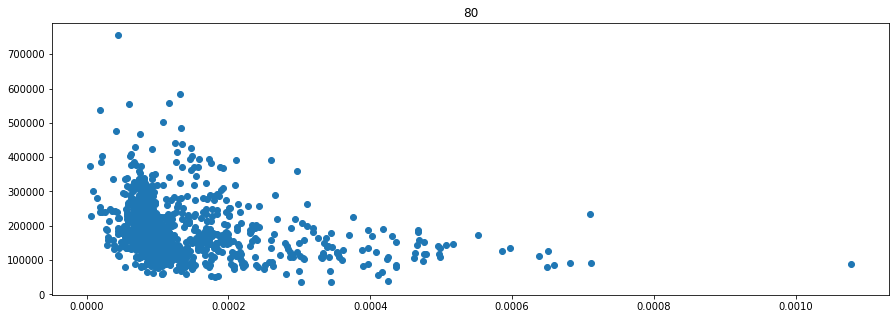

In [27]:
i = 0
for x in X_train.T:
    try:
        i += 1
        plt.figure(figsize = (15, 5))
        plt.title(i)
        plt.scatter(x, Y_train)
    except:
        pass

In [50]:
X

NameError: name 'X' is not defined